<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/HCHO-level-Time-series-forecasting/blob/main/DataEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=fea8cb99a2bb510d2eff2b5dbd27c165bd6c71153a221982ef759a423f78cecb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import col, regexp_replace, when
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

In [5]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()


In [109]:
# Define column names and data types
schema = StructType([
    StructField("HCHO reading", DoubleType(), True),
    StructField("Location", StringType(), True),
    StructField("Current Date", StringType(), True),
    StructField("Next Date", StringType(), True)
])

# Load the data for 'Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper' with specified column names
col_mat_nuw_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/col_mat_nuw_output.csv", header=False, schema=schema)

# Load the data for 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper' with specified column names
mon_kur_jaf_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/mon_kur_jaf_output.csv", header=False, schema=schema)

# Load the data for 'Kandy Proper' with specified column names
kan_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/kan_output.csv", header=False, schema=schema)


In [110]:
col_mat_nuw_df.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [111]:
# Filter data for 'Colombo Proper' and create a new DataFrame
colombo_df = col_mat_nuw_df.filter(col("Location") == "Colombo Proper")

# Filter data for 'Deniyaya, Matara' and create a new DataFrame
deniyaya_matara_df = col_mat_nuw_df.filter(col("Location") == "Deniyaya, Matara")

# Filter data for 'Nuwara Eliya Proper' and create a new DataFrame
nuwara_eliya_df = col_mat_nuw_df.filter(col("Location") == "Nuwara Eliya Proper")

# Filter data for 'Bibile, Monaragala' and create a new DataFrame
bibile_monaragala_df = mon_kur_jaf_df.filter(col("Location") == "Bibile, Monaragala")

# Filter data for 'Kurunegala Proper' and create a new DataFrame
kurunegala_df = mon_kur_jaf_df.filter(col("Location") == "Kurunegala Proper")

# Filter data for 'Jaffna Proper' and create a new DataFrame
jaffna_df = mon_kur_jaf_df.filter(col("Location") == "Jaffna Proper")

# Filter data for 'Kandy Proper' and create a new DataFrame
kandy_df = kan_df.filter(col("Location") == "Kandy Proper")

# Show sample data for verification
colombo_df.show(5)
deniyaya_matara_df.show(5)
nuwara_eliya_df.show(5)
bibile_monaragala_df.show(5)
kurunegala_df.show(5)
jaffna_df.show(5)
kandy_df.show(5)

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
+--------------------+--------------+------------+----------+
only showing top 5 rows

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|                NULL|Deniyaya, Matara|  2019-01-01|2019-01-02|
|5.803530712000793E-6|Deniyaya, Matara|  2019-01-02|2019-01-03|
|2.362357772653922...|Deniyaya, Matara|  2019-01-03|2019-01-04|
|6.437245753953118E-5|Deniyaya, M

In [ ]:

row_count = colombo_df.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


In [ ]:
import pandas as pd
colombo_df_bdbd = colombo_df.toPandas()

start_date = pd.to_datetime('2019-01-01')

expected_date = start_date

for index, row in colombo_df_bdbd.iterrows():
    # Get the current date from the row
    current_date = pd.to_datetime(row['Current Date'])

    if current_date != expected_date:
        print(f"Expected: {expected_date}, Actual: {current_date}")

    expected_date = current_date + pd.DateOffset(days=1)

In [112]:
colombo_df.select("HCHO reading").describe().show()

deniyaya_matara_df.select("HCHO reading").describe().show()

# Summary statistics for 'Nuwara Eliya Proper'
nuwara_eliya_df.select("HCHO reading").describe().show()

# Summary statistics for 'Bibile, Monaragala'
bibile_monaragala_df.select("HCHO reading").describe().show()

# Summary statistics for 'Kurunegala Proper'
kurunegala_df.select("HCHO reading").describe().show()

# Summary statistics for 'Jaffna Proper'
jaffna_df.select("HCHO reading").describe().show()

# Summary statistics for 'Kandy Proper'
kandy_df.select("HCHO reading").describe().show()

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                1339|
|   mean|1.585714042136032...|
| stddev|9.928801616320847E-5|
|    min|-2.29102592175331...|
|    max|6.500630612512026E-4|
+-------+--------------------+

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                 979|
|   mean|9.165608034246397E-5|
| stddev|9.717767267758977E-5|
|    min|-2.59296176552668...|
|    max|8.997101837438971E-4|
+-------+--------------------+

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                 741|
|   mean|8.792586073767327E-5|
| stddev|8.366257795578253E-5|
|    min|-1.78604299088136...|
|    max|4.191362201414739E-4|
+-------+--------------------+

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                1131|
|   mean|1.264313797412045...|
| std

In [10]:
from pyspark.sql.functions import sum

# Count null values for 'Colombo Proper'
colombo_null_count = colombo_df.select([col(c).isNull().cast("int").alias(c) for c in colombo_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Deniyaya, Matara'
deniyaya_matara_null_count = deniyaya_matara_df.select([col(c).isNull().cast("int").alias(c) for c in deniyaya_matara_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Nuwara Eliya Proper'
nuwara_eliya_null_count = nuwara_eliya_df.select([col(c).isNull().cast("int").alias(c) for c in nuwara_eliya_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Bibile, Monaragala'
bibile_monaragala_null_count = bibile_monaragala_df.select([col(c).isNull().cast("int").alias(c) for c in bibile_monaragala_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kurunegala Proper'
kurunegala_null_count = kurunegala_df.select([col(c).isNull().cast("int").alias(c) for c in kurunegala_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Jaffna Proper'
jaffna_null_count = jaffna_df.select([col(c).isNull().cast("int").alias(c) for c in jaffna_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kandy Proper'
kandy_null_count = kandy_df.select([col(c).isNull().cast("int").alias(c) for c in kandy_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Print null counts for each city
print("Null Counts for Colombo Proper:", colombo_null_count)
print("Null Counts for Deniyaya, Matara:", deniyaya_matara_null_count)
print("Null Counts for Nuwara Eliya Proper:", nuwara_eliya_null_count)
print("Null Counts for Bibile, Monaragala:", bibile_monaragala_null_count)
print("Null Counts for Kurunegala Proper:", kurunegala_null_count)
print("Null Counts for Jaffna Proper:", jaffna_null_count)
print("Null Counts for Kandy Proper:", kandy_null_count)

Null Counts for Colombo Proper: 487
Null Counts for Deniyaya, Matara: 847
Null Counts for Nuwara Eliya Proper: 1085
Null Counts for Bibile, Monaragala: 695
Null Counts for Kurunegala Proper: 592
Null Counts for Jaffna Proper: 365
Null Counts for Kandy Proper: 793


In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import mean, lag, lead, col, when

# Define window specification
windowSpec = Window.orderBy("Current Date")

# Calculate lag and lead values
lag_value = lag("HCHO reading").over(windowSpec)
lead_value = lead("HCHO reading").over(windowSpec)

# Replace missing values with the mean of neighboring values
deniyaya_matara_df = deniyaya_matara_df.withColumn("HCHO reading",
                                    when(col("HCHO reading").isNull(),
                                         (lag_value + lead_value) / 2).otherwise(col("HCHO reading")))

# Show the resulting DataFrame with replaced values
deniyaya_matara_df.show()

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|                NULL|Deniyaya, Matara|  2019-01-01|2019-01-02|
|5.803530712000793E-6|Deniyaya, Matara|  2019-01-02|2019-01-03|
|2.362357772653922...|Deniyaya, Matara|  2019-01-03|2019-01-04|
|6.437245753953118E-5|Deniyaya, Matara|  2019-01-04|2019-01-05|
|5.349707092885017E-5|Deniyaya, Matara|  2019-01-05|2019-01-06|
|1.315594859189690...|Deniyaya, Matara|  2019-01-06|2019-01-07|
|6.269859896976347E-5|Deniyaya, Matara|  2019-01-07|2019-01-08|
|2.298263979970634E-5|Deniyaya, Matara|  2019-01-08|2019-01-09|
|4.744255583342940...|Deniyaya, Matara|  2019-01-09|2019-01-10|
|7.190247186715247E-5|Deniyaya, Matara|  2019-01-10|2019-01-11|
|1.542091441034087...|Deniyaya, Matara|  2019-01-11|2019-01-12|
|1.406986305217021E-4|Deniyaya, Matara|  2019-01-12|2019-01-13|
|                NULL|Deniyaya, Matara| 

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col

def impute_missing_values_linear_regression(df):
    # Drop rows with missing values as Linear Regression cannot handle them directly
    df = df.dropna(subset=["HCHO reading"])

    # Convert string columns to numerical using StringIndexer
    location_indexer = StringIndexer(inputCol="Location", outputCol="LocationIndex")
    date_indexer = StringIndexer(inputCol="Current Date", outputCol="DateIndex")
    next_date_indexer = StringIndexer(inputCol="Next Date", outputCol="NextDateIndex")

    # Fit StringIndexer models
    location_indexer_model = location_indexer.fit(df)
    date_indexer_model = date_indexer.fit(df)
    next_date_indexer_model = next_date_indexer.fit(df)

    # Apply StringIndexer models to DataFrame
    df = location_indexer_model.transform(df)
    df = date_indexer_model.transform(df)
    df = next_date_indexer_model.transform(df)

    # Assemble features
    assembler = VectorAssembler(inputCols=["LocationIndex", "DateIndex", "NextDateIndex"], outputCol="features")
    df_assembled = assembler.transform(df)

    # Train a linear regression model
    lr = LinearRegression(featuresCol="features", labelCol="HCHO reading")
    lr_model = lr.fit(df_assembled)

    # Apply the model to predict missing values
    predictions = lr_model.transform(df_assembled)

    # Replace missing values with predicted values
    return predictions.withColumn("HCHO reading",
                                   when(col("HCHO reading").isNull(),
                                        col("prediction")).otherwise(col("HCHO reading")))

# Apply the function to the DataFrame
colombo_df = impute_missing_values_linear_regression(colombo_df)
deniyaya_matara_df = impute_missing_values_linear_regression(deniyaya_matara_df)
nuwara_eliya_df = impute_missing_values_linear_regression(nuwara_eliya_df)
bibile_monaragala_df = impute_missing_values_linear_regression(bibile_monaragala_df)
kurunegala_df = impute_missing_values_linear_regression(kurunegala_df)
jaffna_df = impute_missing_values_linear_regression(jaffna_df)
kandy_df = impute_missing_values_linear_regression(kandy_df)

In [46]:
from pyspark.sql import Window
from pyspark.sql.functions import col, avg, when

def fill_missing_values_with_rolling_mean(df, column_name, window_size=3):
    """
    Fills missing values in a PySpark DataFrame column using the rolling mean.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with missing values.
        column_name (str): The name of the column with missing values.
        window_size (int, optional): The window size for calculating the rolling mean.
            Defaults to 3 (considering 3 values before the missing value).

    Returns:
        pyspark.sql.DataFrame: The DataFrame with missing values replaced by the rolling mean.
    """

    # Create a window specification
    window = Window.orderBy(df["Current Date"]).rowsBetween(-window_size + 1, 0)

    # Fill missing values with the rolling mean of the previous 'window_size' values
    df = df.withColumn(
        column_name,
        when(col(column_name).isNull(),
             avg(when(col(column_name).isNotNull(), col(column_name))).over(window))
             .otherwise(col(column_name))
    )

    return df

# Apply the function to each DataFrame
colombo_df = fill_missing_values_with_rolling_mean(colombo_df, "HCHO reading")
deniyaya_matara_df = fill_missing_values_with_rolling_mean(deniyaya_matara_df, "HCHO reading")
nuwara_eliya_df = fill_missing_values_with_rolling_mean(nuwara_eliya_df, "HCHO reading")
bibile_monaragala_df = fill_missing_values_with_rolling_mean(bibile_monaragala_df, "HCHO reading")
kurunegala_df = fill_missing_values_with_rolling_mean(kurunegala_df, "HCHO reading")
jaffna_df = fill_missing_values_with_rolling_mean(jaffna_df, "HCHO reading")
kandy_df = fill_missing_values_with_rolling_mean(kandy_df, "HCHO reading")

# Show the filled DataFrames
print("Colombo Filled DataFrame:")
colombo_df.show()

print("Deniyaya Matara Filled DataFrame:")
deniyaya_matara_df.show()

print("Nuwara Eliya Filled DataFrame:")
nuwara_eliya_df.show()

print("Bibile Monaragala Filled DataFrame:")
bibile_monaragala_df.show()

print("Kurunegala Filled DataFrame:")
kurunegala_df.show()

print("Jaffna Filled DataFrame:")
jaffna_df.show()

print("Kandy Filled DataFrame:")
kandy_df.show()


Colombo Filled DataFrame:
+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|1.904303130490019...|Colombo Proper|  2019-

In [113]:
from pyspark.sql import Window
from pyspark.sql.functions import col, last



def fill_missing_values_forward(df, column_name):
    """
    Fills missing values in a PySpark DataFrame column with the previous non-null value.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with missing values.
        column_name (str): The name of the column with missing values.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with missing values replaced by the previous non-null value.
    """

    # Create a window specification for forward fill
    ffill = Window.partitionBy('Location').orderBy('Current Date').rowsBetween(Window.unboundedPreceding, Window.currentRow)

    # Fill missing values with the previous non-null value
    df = df.withColumn(column_name + '_filled', last(column_name, ignorenulls=True).over(ffill))

    return df

# Apply the function to each DataFrame
colombo_df = fill_missing_values_forward(colombo_df, 'HCHO reading')
deniyaya_matara_df = fill_missing_values_forward(deniyaya_matara_df, 'HCHO reading')
nuwara_eliya_df = fill_missing_values_forward(nuwara_eliya_df, 'HCHO reading')
bibile_monaragala_df = fill_missing_values_forward(bibile_monaragala_df, 'HCHO reading')
kurunegala_df = fill_missing_values_forward(kurunegala_df, 'HCHO reading')
jaffna_df = fill_missing_values_forward(jaffna_df, 'HCHO reading')
kandy_df = fill_missing_values_forward(kandy_df, 'HCHO reading')

# Show the filled DataFrames
print("Colombo Filled DataFrame:")
colombo_df.show()

print("Deniyaya Matara Filled DataFrame:")
deniyaya_matara_df.show()

print("Nuwara Eliya Filled DataFrame:")
nuwara_eliya_df.show()

print("Bibile Monaragala Filled DataFrame:")
bibile_monaragala_df.show()

print("Kurunegala Filled DataFrame:")
kurunegala_df.show()

print("Jaffna Filled DataFrame:")
jaffna_df.show()

print("Kandy Filled DataFrame:")
kandy_df.show()


Colombo Filled DataFrame:
+--------------------+--------------+------------+----------+--------------------+
|        HCHO reading|      Location|Current Date| Next Date| HCHO reading_filled|
+--------------------+--------------+------------+----------+--------------------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|

In [114]:
from pyspark.sql.functions import coalesce, lead
from pyspark.sql import Window

def fill_missing_values_backward(df, column_name):
    """
    Fills missing values in a PySpark DataFrame column with the next non-null value (backward fill).

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with missing values.
        column_name (str): The name of the column with missing values.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with missing values replaced by the next non-null value.
    """

    # Create a window specification for backward fill
    bfill = Window.partitionBy('Location').orderBy('Current Date')

    # Fill missing values with the next non-null value
    df = df.withColumn(column_name + '_filled_backwards',
                       coalesce(df[column_name], lead(df[column_name], 1).over(bfill)))

    return df

# Apply the function to each DataFrame
colombo_df = fill_missing_values_backward(colombo_df, 'HCHO reading_filled')
deniyaya_matara_df = fill_missing_values_backward(deniyaya_matara_df, 'HCHO reading_filled')
nuwara_eliya_df = fill_missing_values_backward(nuwara_eliya_df, 'HCHO reading_filled')
bibile_monaragala_df = fill_missing_values_backward(bibile_monaragala_df, 'HCHO reading_filled')
kurunegala_df = fill_missing_values_backward(kurunegala_df, 'HCHO reading_filled')
jaffna_df = fill_missing_values_backward(jaffna_df, 'HCHO reading_filled')
kandy_df = fill_missing_values_backward(kandy_df, 'HCHO reading_filled')
nuwara_eliya_df = fill_missing_values_backward(nuwara_eliya_df, 'HCHO reading_filled_filled_backwards')

In [115]:
# Show the filled DataFrames
print("Colombo Filled DataFrame:")
colombo_df.show()

print("Deniyaya Matara Filled DataFrame:")
deniyaya_matara_df.show()

print("Nuwara Eliya Filled DataFrame:")
nuwara_eliya_df.show()

print("Bibile Monaragala Filled DataFrame:")
bibile_monaragala_df.show()

print("Kurunegala Filled DataFrame:")
kurunegala_df.show()

print("Jaffna Filled DataFrame:")
jaffna_df.show()

print("Kandy Filled DataFrame:")
kandy_df.show()


Colombo Filled DataFrame:
+--------------------+--------------+------------+----------+--------------------+------------------------------------+
|        HCHO reading|      Location|Current Date| Next Date| HCHO reading_filled|HCHO reading_filled_filled_backwards|
+--------------------+--------------+------------+----------+--------------------+------------------------------------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|                1.969834395781014...|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|                2.625522171968594...|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|                9.852118897938794E-5|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|                2.099320518114242E-4|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|                1.785337298892930...|
|1.08229670023

In [116]:
from pyspark.sql.functions import sum

# Count null values for 'Colombo Proper'
colombo_null_count = colombo_df.select([col(c).isNull().cast("int").alias(c) for c in colombo_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Deniyaya, Matara'
deniyaya_matara_null_count = deniyaya_matara_df.select([col(c).isNull().cast("int").alias(c) for c in deniyaya_matara_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Nuwara Eliya Proper'
nuwara_eliya_null_count = nuwara_eliya_df.select([col(c).isNull().cast("int").alias(c) for c in nuwara_eliya_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Bibile, Monaragala'
bibile_monaragala_null_count = bibile_monaragala_df.select([col(c).isNull().cast("int").alias(c) for c in bibile_monaragala_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kurunegala Proper'
kurunegala_null_count = kurunegala_df.select([col(c).isNull().cast("int").alias(c) for c in kurunegala_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Jaffna Proper'
jaffna_null_count = jaffna_df.select([col(c).isNull().cast("int").alias(c) for c in jaffna_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kandy Proper'
kandy_null_count = kandy_df.select([col(c).isNull().cast("int").alias(c) for c in kandy_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Print null counts for each city
print("Null Counts for Colombo Proper:", colombo_null_count)
print("Null Counts for Deniyaya, Matara:", deniyaya_matara_null_count)
print("Null Counts for Nuwara Eliya Proper:", nuwara_eliya_null_count)
print("Null Counts for Bibile, Monaragala:", bibile_monaragala_null_count)
print("Null Counts for Kurunegala Proper:", kurunegala_null_count)
print("Null Counts for Jaffna Proper:", jaffna_null_count)
print("Null Counts for Kandy Proper:", kandy_null_count)

Null Counts for Colombo Proper: 0
Null Counts for Deniyaya, Matara: 0
Null Counts for Nuwara Eliya Proper: 0
Null Counts for Bibile, Monaragala: 0
Null Counts for Kurunegala Proper: 0
Null Counts for Jaffna Proper: 0
Null Counts for Kandy Proper: 0


In [117]:
def drop_and_rename_columns(df):
    """
    Drops the existing 'HCHO reading' column and renames the backward filled column.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the columns.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with columns dropped and renamed.
    """
    # Drop the existing 'HCHO reading' column
    df = df.drop('HCHO reading')

    # Drop the existing 'HCHO reading' column
    df = df.drop('HCHO reading_filled')

    # Rename the backward filled column to 'HCHO reading'
    df = df.withColumnRenamed('HCHO reading_filled_filled_backwards', 'HCHO reading')

    return df

# Apply the function to each DataFrame
colombo_df = drop_and_rename_columns(colombo_df)
deniyaya_matara_df = drop_and_rename_columns(deniyaya_matara_df)
bibile_monaragala_df = drop_and_rename_columns(bibile_monaragala_df)
kurunegala_df = drop_and_rename_columns(kurunegala_df)
jaffna_df = drop_and_rename_columns(jaffna_df)
kandy_df = drop_and_rename_columns(kandy_df)

In [118]:
# Drop the existing 'HCHO reading' column
nuwara_eliya_df = nuwara_eliya_df.drop('HCHO reading')

# Drop the existing 'HCHO reading' column
nuwara_eliya_df = nuwara_eliya_df.drop('HCHO reading_filled')

nuwara_eliya_df = nuwara_eliya_df.drop('HCHO reading_filled_filled_backwards')

# Rename the backward filled column to 'HCHO reading'
nuwara_eliya_df = nuwara_eliya_df.withColumnRenamed('HCHO reading_filled_filled_backwards_filled_backwards', 'HCHO reading')

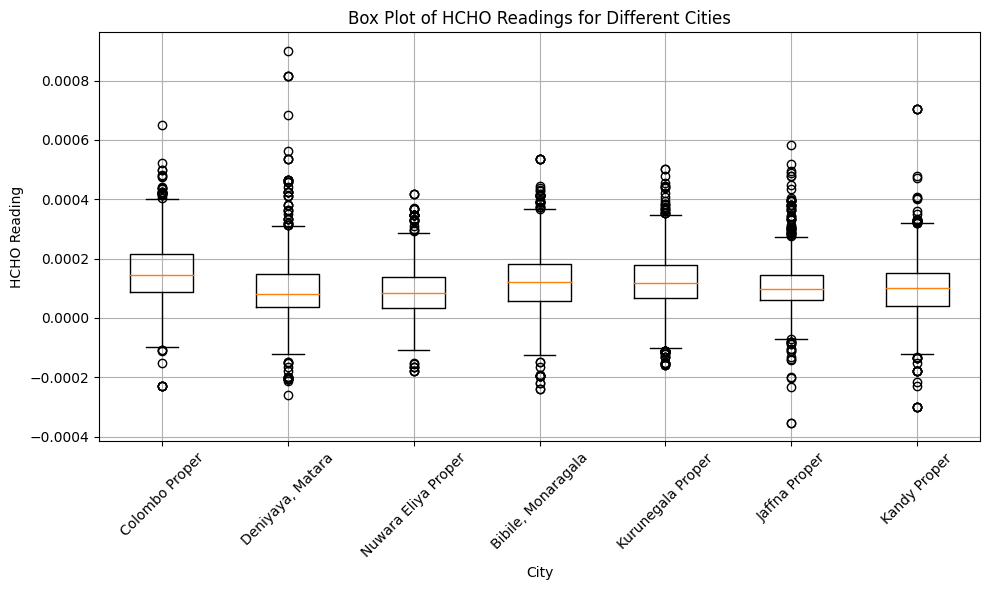

In [119]:
import matplotlib.pyplot as plt

# Convert each DataFrame to Pandas DataFrame for plotting
colombo_pd = colombo_df.select("HCHO reading").toPandas()
deniyaya_matara_pd = deniyaya_matara_df.select("HCHO reading").toPandas()
nuwara_eliya_pd = nuwara_eliya_df.select("HCHO reading").toPandas()
bibile_monaragala_pd = bibile_monaragala_df.select("HCHO reading").toPandas()
kurunegala_pd = kurunegala_df.select("HCHO reading").toPandas()
jaffna_pd = jaffna_df.select("HCHO reading").toPandas()
kandy_pd = kandy_df.select("HCHO reading").toPandas()

# Plot box plots for each city
plt.figure(figsize=(10, 6))
plt.boxplot([colombo_pd["HCHO reading"], deniyaya_matara_pd["HCHO reading"], nuwara_eliya_pd["HCHO reading"],
             bibile_monaragala_pd["HCHO reading"], kurunegala_pd["HCHO reading"], jaffna_pd["HCHO reading"],
             kandy_pd["HCHO reading"]],
            labels=["Colombo Proper", "Deniyaya, Matara", "Nuwara Eliya Proper", "Bibile, Monaragala",
                    "Kurunegala Proper", "Jaffna Proper", "Kandy Proper"])
plt.xlabel("City")
plt.ylabel("HCHO Reading")
plt.title("Box Plot of HCHO Readings for Different Cities")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
print(colombo_df.dtypes)

[('Location', 'string'), ('Current Date', 'string'), ('Next Date', 'string'), ('HCHO reading', 'double')]


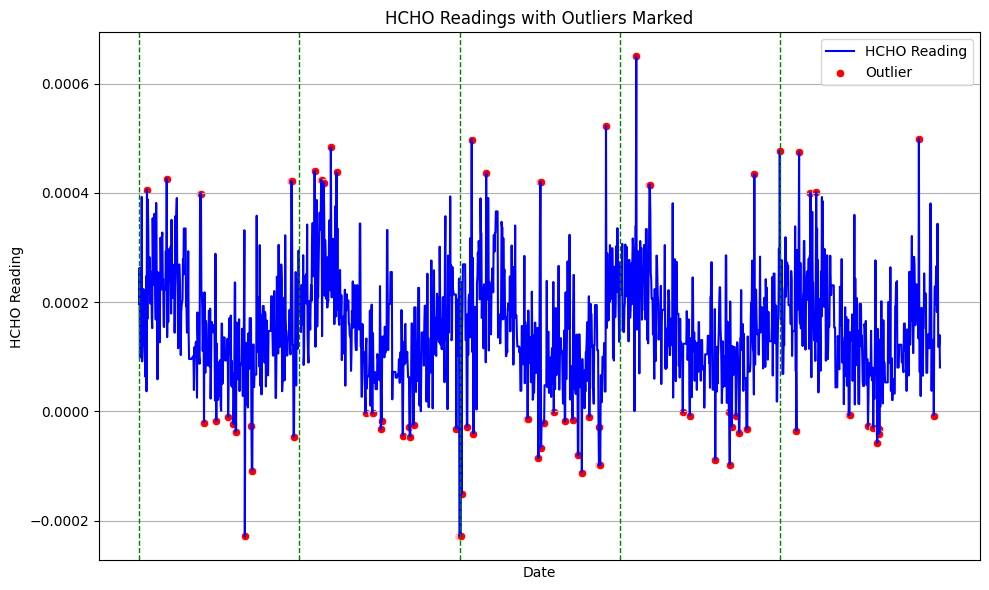

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to plot HCHO readings with outliers marked
def plot_hcho_with_outliers(df):
    df = df.toPandas()

    # Filter data to include only the specified date range
    df = df[(df["Current Date"] >= "2019-01-01") & (df["Current Date"] <= "2023-12-31")]
    Standard_deviation = df["HCHO reading"].std()

    # Detect outliers using a lower threshold
    threshold = Standard_deviation*4

    df["is_outlier"] = (df["HCHO reading"] > threshold) | (df["HCHO reading"] < 0)

    # Extract year from "Current Date" column
    df["Year"] = pd.to_datetime(df["Current Date"]).dt.year

    # Identify the start of each new year
    df["New Year"] = df["Year"] != df["Year"].shift(1)

    # Plot HCHO readings as line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Current Date", y="HCHO reading", color="blue", label="HCHO Reading")

    # Overlay outliers on the plot
    outliers_df = df[df["is_outlier"]]
    sns.scatterplot(data=outliers_df, x="Current Date", y="HCHO reading", color="red", label="Outlier")

    # Mark the start of each new year with a vertical line
    for idx, row in df.iterrows():
        if row["New Year"]:
            plt.axvline(x=row["Current Date"], color="green", linestyle="--", linewidth=1)

    # Customize plot appearance
    plt.title("HCHO Readings with Outliers Marked")
    plt.xlabel("Date")
    plt.ylabel("HCHO Reading")
    plt.legend()
    plt.xticks([])  # Remove x-axis ticks
    plt.grid(True)  # Add gridlines
    plt.tight_layout()  # Adjust layout
    plt.show()

    df = spark.createDataFrame(df)
# Plot HCHO readings with outliers marked
plot_hcho_with_outliers(colombo_df)



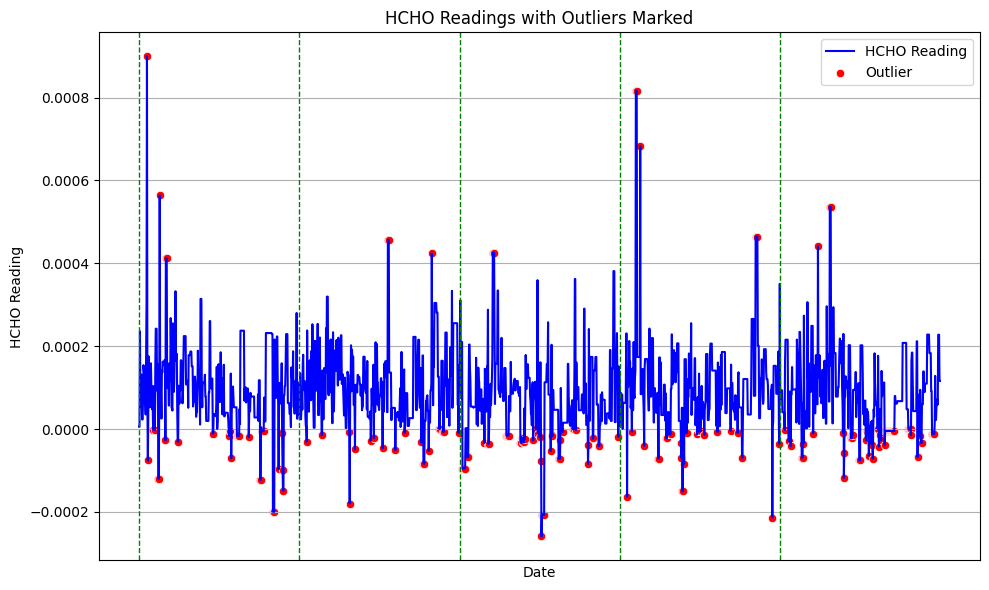

In [121]:
plot_hcho_with_outliers(deniyaya_matara_df)

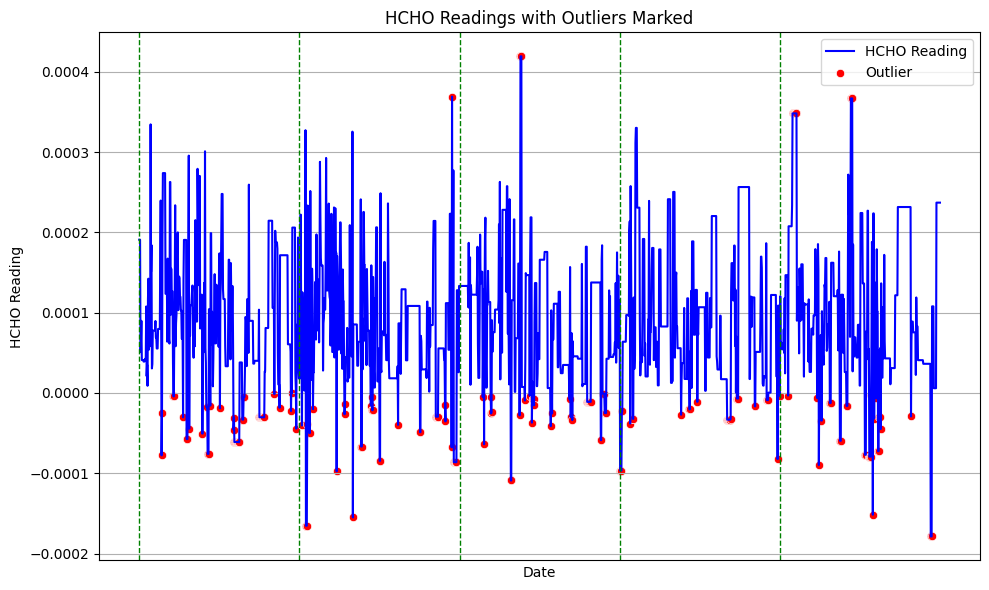

In [122]:
plot_hcho_with_outliers(nuwara_eliya_df)

In [95]:
colombo_df.printSchema()
colombo_df.show()

root
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)
 |-- HCHO reading: double (nullable = true)

+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2

In [145]:
from pyspark.sql.functions import mean, stddev, col, when
from pyspark.sql.window import Window

# Define a function to replace outliers
def replace_outliers(df, column_name, colombo_threshold_multiplier=4, other_threshold_multiplier=3, window_size=20):
    # Calculate mean and standard deviation
    mean_value = df.select(mean(col(column_name))).first()[0]
    stddev_value = df.select(stddev(col(column_name))).first()[0]

    # Determine the threshold multiplier based on the city
    if df.select("Location").distinct().count() == 1 and df.select("Location").distinct().first()[0] == "Colombo Proper":
        threshold_multiplier = colombo_threshold_multiplier
    else:
        threshold_multiplier = other_threshold_multiplier

    # Calculate the threshold based on the standard deviation and threshold multiplier
    threshold = mean_value + threshold_multiplier * stddev_value

    # Replace negative values with zero
    df = df.withColumn(column_name, when(col(column_name) < 0, 0).otherwise(col(column_name)))

    # Create a lag column to access the previous values
    lag_column = column_name + "_lag"
    window_spec = Window.orderBy("Current Date").rowsBetween(-window_size, -1)
    df = df.withColumn(lag_column, mean(col(column_name)).over(window_spec))

    # Fill forward the outliers with the rolling mean
    outliers_df = df.filter((col(column_name) > threshold) | (col(column_name) < 0))
    df = df.withColumn(column_name, when(col(column_name) > threshold, col(lag_column)).otherwise(col(column_name)))

    # Drop the lag column
    df = df.drop(lag_column)

    return df, outliers_df

# List of DataFrames for all cities
city_dfs = [colombo_df, deniyaya_matara_df, nuwara_eliya_df, bibile_monaragala_df, kurunegala_df, jaffna_df, kandy_df]

# Remove outliers for each city DataFrame and store outliers separately
city_dfs_without_outliers = []
city_outliers_dfs = []

for city_df in city_dfs:
    city_df_without_outliers, city_outliers_df = replace_outliers(city_df, "HCHO reading")
    city_dfs_without_outliers.append(city_df_without_outliers)
    city_outliers_dfs.append(city_outliers_df)

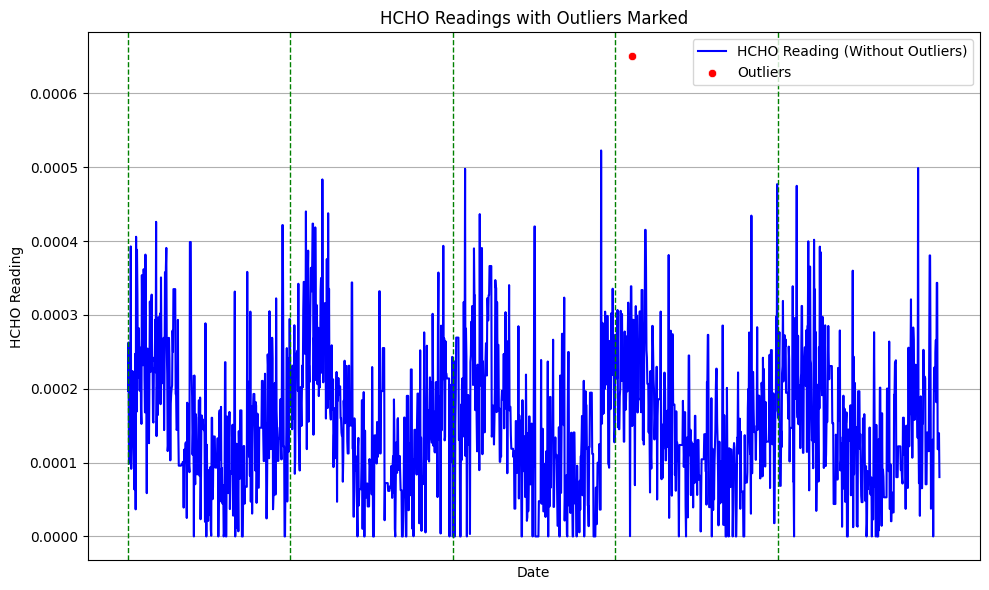

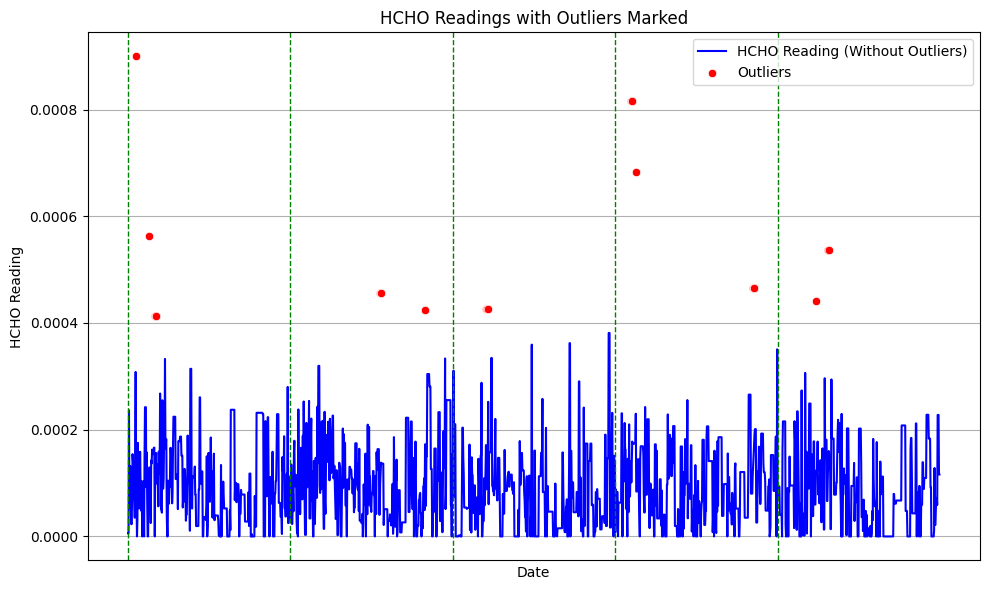

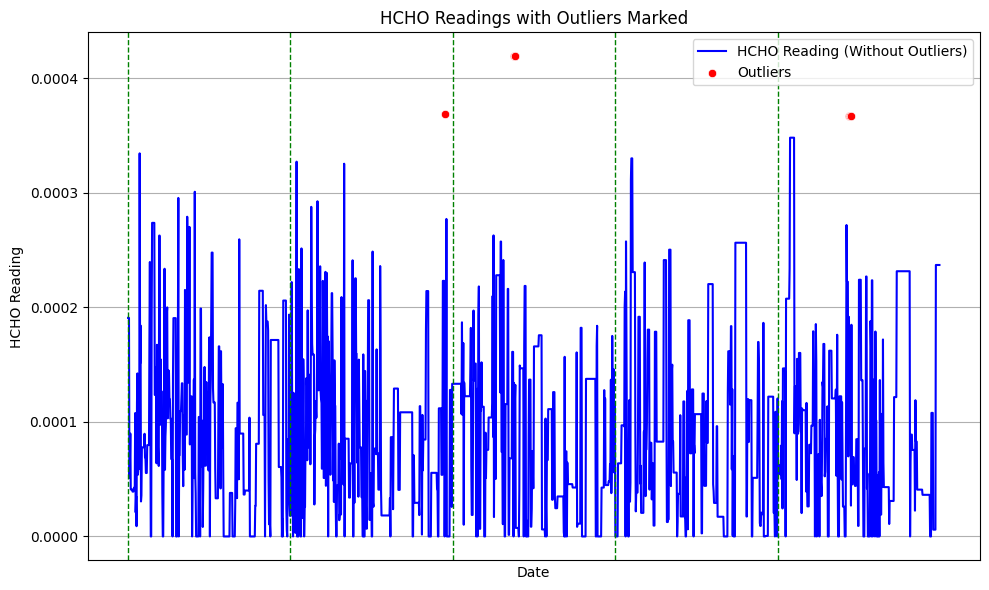

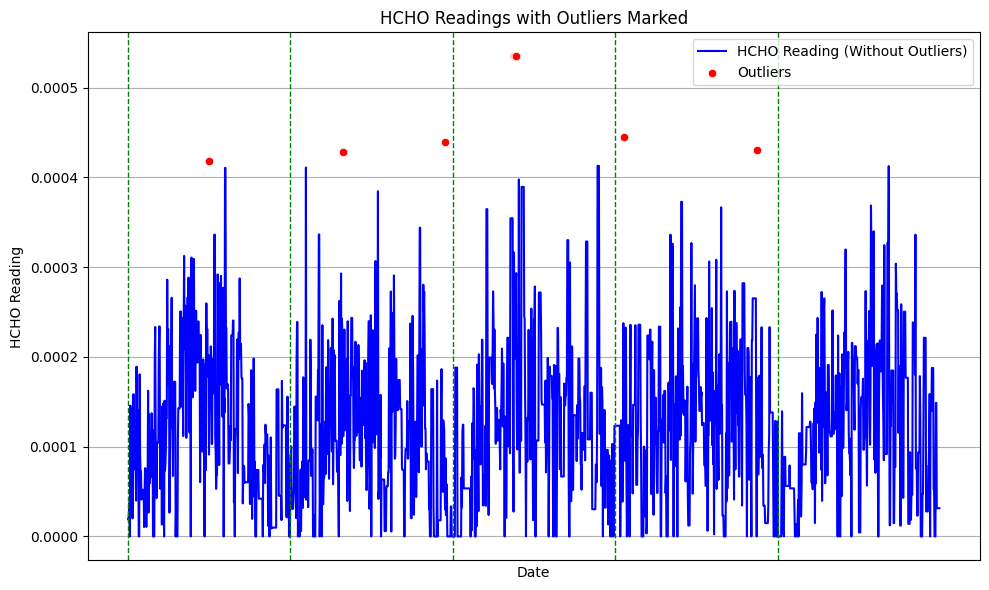

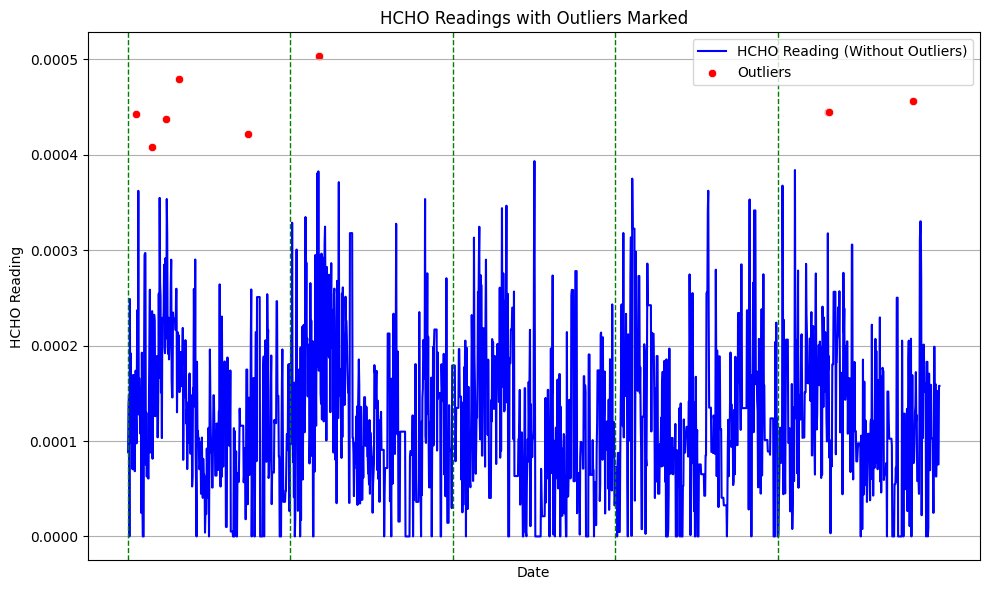

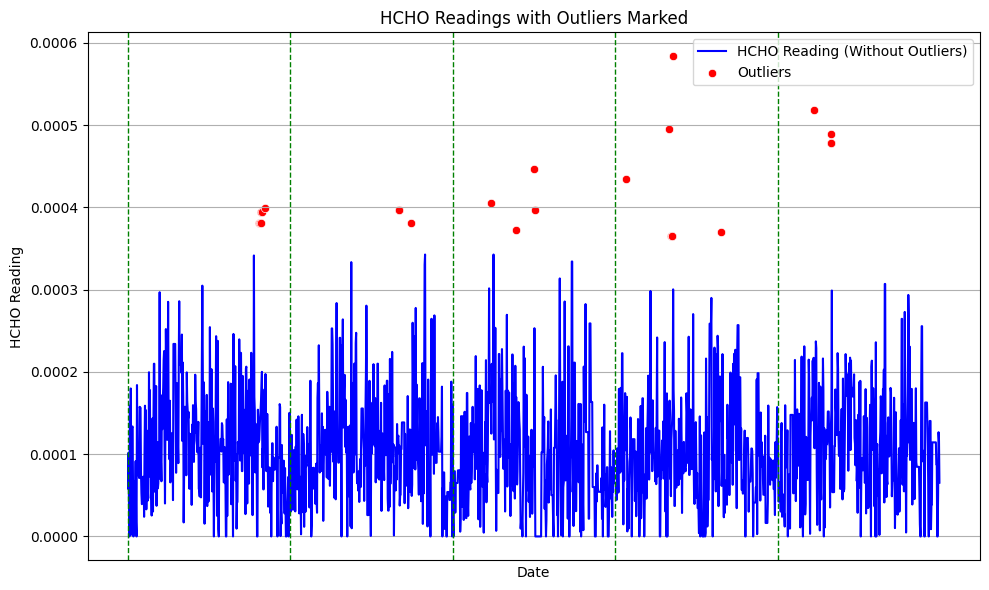

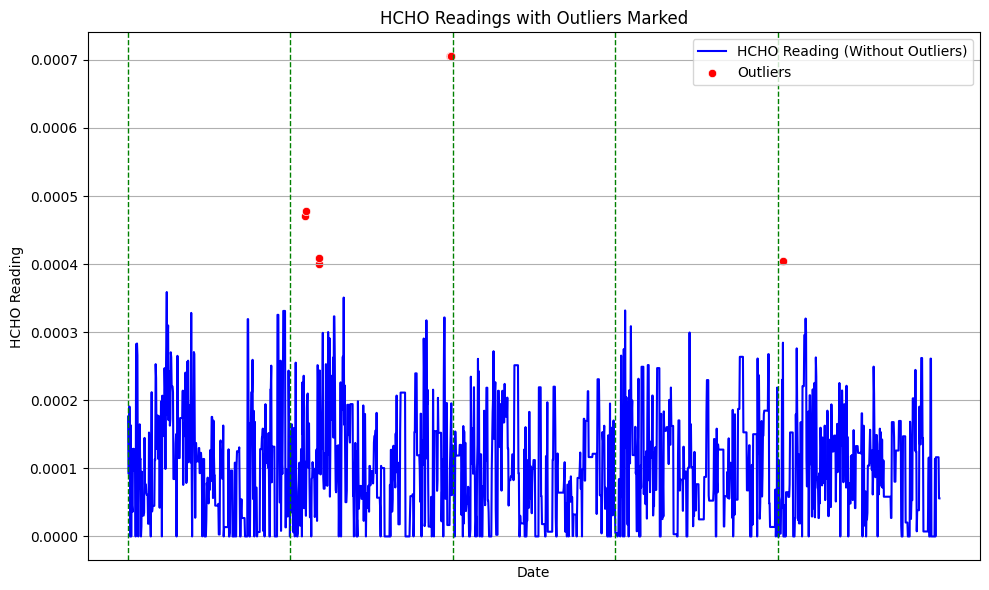

In [146]:
# Plot HCHO readings with outliers marked
def plot_hcho_with_outliers(df, outliers_df):
    df = df.toPandas()
    outliers_df = outliers_df.toPandas()

    # Filter data to include only the specified date range
    df = df[(df["Current Date"] >= "2019-01-01") & (df["Current Date"] <= "2023-12-31")]

    # Extract year from "Current Date" column
    df["Year"] = pd.to_datetime(df["Current Date"]).dt.year

    # Identify the start of each new year
    df["New Year"] = df["Year"] != df["Year"].shift(1)

    # Plot HCHO readings as line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Current Date", y="HCHO reading", color="blue", label="HCHO Reading (Without Outliers)")

    # Overlay outliers on the plot
    sns.scatterplot(data=outliers_df, x="Current Date", y="HCHO reading", color="red", label="Outliers")

    # Mark the start of each new year with a vertical line
    for idx, row in df.iterrows():
        if row["New Year"]:
            plt.axvline(x=row["Current Date"], color="green", linestyle="--", linewidth=1)

    # Customize plot appearance
    plt.title("HCHO Readings with Outliers Marked")
    plt.xlabel("Date")
    plt.ylabel("HCHO Reading")
    plt.legend()
    plt.xticks([])  # Remove x-axis ticks
    plt.grid(True)  # Add gridlines
    plt.tight_layout()  # Adjust layout
    plt.show()

# Plot for Colombo
plot_hcho_with_outliers(city_dfs_without_outliers[0], city_outliers_dfs[0])

# Plot for other cities
for i in range(1, len(city_dfs_without_outliers)):
    plot_hcho_with_outliers(city_dfs_without_outliers[i], city_outliers_dfs[i])

In [ ]:
from pyspark.sql.functions import stddev, mean, col, abs as abs_spark

# Define a function to remove outliers
def remove_outliers(df, column_name, threshold=3):
    # Calculate mean and standard deviation
    mean_value = df.select(mean(col(column_name))).first()[0]
    stddev_value = df.select(stddev(col(column_name))).first()[0]

    # Calculate Z-score
    df_with_zscore = df.withColumn("z_score", (col(column_name) - mean_value) / stddev_value)

    # Filter out outliers based on threshold
    filtered_df = df_with_zscore.filter(abs_spark(col("z_score")) <= threshold)

    # Drop the z_score column
    filtered_df = filtered_df.drop("z_score")

    return filtered_df

# List of DataFrames for all cities
city_dfs = [colombo_df, deniyaya_matara_df, nuwara_eliya_df, bibile_monaragala_df, kurunegala_df, jaffna_df, kandy_df]

# Remove outliers for each city DataFrame
city_dfs_without_outliers = []

for city_df in city_dfs:
    city_df_without_outliers = remove_outliers(city_df, "HCHO reading")
    city_dfs_without_outliers.append(city_df_without_outliers)

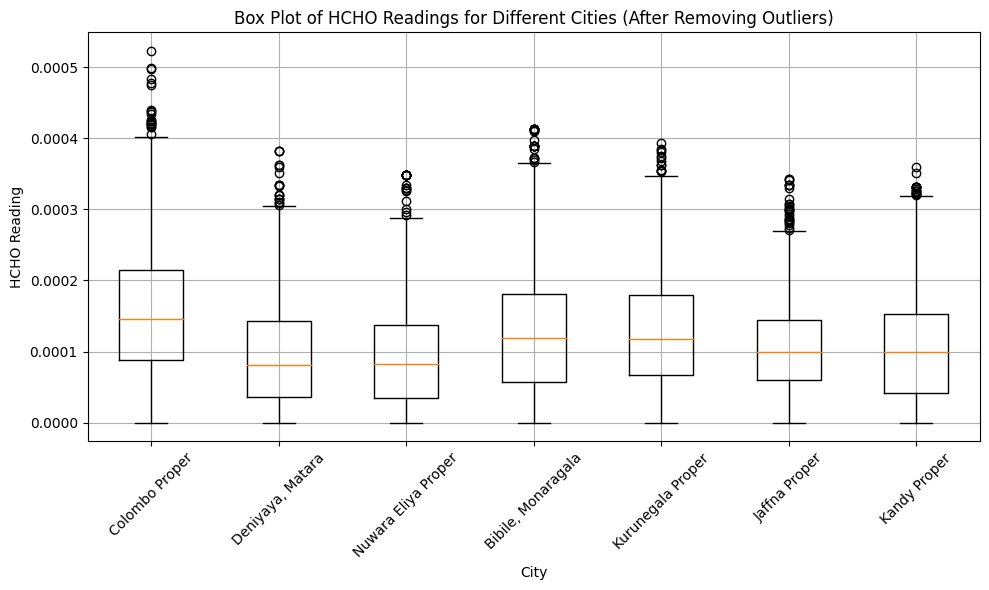

In [147]:
import matplotlib.pyplot as plt

# Convert each DataFrame to Pandas DataFrame for plotting
city_dfs_without_outliers_pd = [city_df.select("HCHO reading").toPandas() for city_df in city_dfs_without_outliers]

# Plot box plots for each city
plt.figure(figsize=(10, 6))
plt.boxplot([city_df["HCHO reading"] for city_df in city_dfs_without_outliers_pd],
            labels=[city_df.select("Location").first()[0] for city_df in city_dfs])
plt.xlabel("City")
plt.ylabel("HCHO Reading")
plt.title("Box Plot of HCHO Readings for Different Cities (After Removing Outliers)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [148]:
for city_df_pd in city_dfs_without_outliers_pd:
    print(city_df_pd["HCHO reading"].describe())

count    1826.000000
mean        0.000156
std         0.000094
min         0.000000
25%         0.000088
50%         0.000145
75%         0.000214
max         0.000523
Name: HCHO reading, dtype: float64
count    1826.000000
mean        0.000094
std         0.000076
min         0.000000
25%         0.000036
50%         0.000082
75%         0.000143
max         0.000381
Name: HCHO reading, dtype: float64
count    1826.000000
mean        0.000095
std         0.000076
min         0.000000
25%         0.000035
50%         0.000083
75%         0.000137
max         0.000348
Name: HCHO reading, dtype: float64
count    1826.000000
mean        0.000124
std         0.000086
min         0.000000
25%         0.000057
50%         0.000119
75%         0.000181
max         0.000413
Name: HCHO reading, dtype: float64
count    1826.000000
mean        0.000127
std         0.000080
min         0.000000
25%         0.000066
50%         0.000118
75%         0.000179
max         0.000393
Name: HCHO reading, 

In [149]:
print("Colombo Proper:")
colombo_df.show()

print("Deniyaya, Matara:")
deniyaya_matara_df.show()

print("Nuwara Eliya Proper:")
nuwara_eliya_df.show()

print("Bibile, Monaragala:")
bibile_monaragala_df.show()

print("Kurunegala Proper:")
kurunegala_df.show()

print("Jaffna Proper:")
jaffna_df.show()

print("Kandy Proper:")
kandy_df.show()

Colombo Proper:
+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2019-01-11|2019-01-12|2.239188166801278...|
|Colombo Proper|  2019-01-12|2019-01-13|1.569418094178759...|
|Colombo Proper|  2019-01-13|2019-01-14|1.569418094178

In [150]:
colombo_df = city_dfs_without_outliers [0]
deniyaya_matara_df = city_dfs_without_outliers [1]
nuwara_eliya_df = city_dfs_without_outliers [2]
bibile_monaragala_df = city_dfs_without_outliers [3]
kurunegala_df = city_dfs_without_outliers [4]
jaffna_df = city_dfs_without_outliers [5]
kandy_df = city_dfs_without_outliers [6]

In [151]:
colombo_df_main = city_dfs_without_outliers [0]
deniyaya_matara_df_main = city_dfs_without_outliers [1]
nuwara_eliya_df_main = city_dfs_without_outliers [2]
bibile_monaragala_df_main = city_dfs_without_outliers [3]
kurunegala_df_main = city_dfs_without_outliers [4]
jaffna_df_main = city_dfs_without_outliers [5]
kandy_df_main = city_dfs_without_outliers [6]

In [152]:
from pyspark.sql.functions import year

def print_2018_2024_count(df):
    # Check the count of records in 2018 and 2024
    count_2018 = df.filter(year(df['Current Date']) == 2018).count()
    count_2024 = df.filter(year(df['Current Date']) == 2024).count()

    print("Count of records in 2018", ":", count_2018)
    print("Count of records in 2024", ":", count_2024)

    # Filter out records from 2018 and 2024
    filtered_df = df.filter((year(df['Current Date']) != 2018) & (year(df['Current Date']) != 2024))

    return filtered_df

print("Colombo Proper:")
colombo_df= print_2018_2024_count(colombo_df)

print("Deniyaya, Matara:")
deniyaya_matara_df = print_2018_2024_count(deniyaya_matara_df)

Colombo Proper:
Count of records in 2018 : 0
Count of records in 2024 : 0
Deniyaya, Matara:
Count of records in 2018 : 0
Count of records in 2024 : 0


In [153]:
# Specifying the file paths for each DataFrame CSV file
colombo_csv_path = '/content/drive/MyDrive/data engineering CW/colombo_df.csv'
deniyaya_matara_csv_path = '/content/drive/MyDrive/data engineering CW/deniyaya_matara_df.csv'
nuwara_eliya_csv_path = '/content/drive/MyDrive/data engineering CW/nuwara_eliya_df.csv'
bibile_monaragala_csv_path = '/content/drive/MyDrive/data engineering CW/bibile_monaragala_df.csv'
kurunegala_csv_path = '/content/drive/MyDrive/data engineering CW/kurunegala_df.csv'
jaffna_csv_path = '/content/drive/MyDrive/data engineering CW/jaffna_df.csv'
kandy_csv_path = '/content/drive/MyDrive/data engineering CW/kandy_df.csv'

# Exporting each DataFrame to a CSV file
colombo_df.write.csv(colombo_csv_path, header=True, mode="overwrite")
deniyaya_matara_df.write.csv(deniyaya_matara_csv_path, header=True, mode="overwrite")
nuwara_eliya_df.write.csv(nuwara_eliya_csv_path, header=True, mode="overwrite")
bibile_monaragala_df.write.csv(bibile_monaragala_csv_path, header=True, mode="overwrite")
kurunegala_df.write.csv(kurunegala_csv_path, header=True, mode="overwrite")
jaffna_df.write.csv(jaffna_csv_path, header=True, mode="overwrite")
kandy_df.write.csv(kandy_csv_path, header=True, mode="overwrite")


In [154]:
from functools import reduce

# List of DataFrames for all cities
city_dfs = [colombo_df, deniyaya_matara_df, nuwara_eliya_df, bibile_monaragala_df, kurunegala_df, jaffna_df, kandy_df]

# Join all city DataFrames into a single DataFrame
all_cities_df = reduce(lambda df1, df2: df1.union(df2), city_dfs)

# Show the combined DataFrame
all_cities_df.show()

+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2019-01-11|2019-01-12|2.239188166801278...|
|Colombo Proper|  2019-01-12|2019-01-13|1.569418094178759...|
|Colombo Proper|  2019-01-13|2019-01-14|1.569418094178759...|
|Colombo

In [155]:
from pyspark.sql import functions as F

# Group by 'Location' and sum the 'HCHO reading' column
sum_hcho_levels_df = all_cities_df.groupBy('Location').agg(F.sum('HCHO reading').alias('Total HCHO Levels'))

# Show the DataFrame with the sum of HCHO levels for each city
sum_hcho_levels_df.show()

# Export the DataFrame to a CSV file
sum_hcho_levels_csv_path = '/content/drive/MyDrive/data engineering CW/sum_hcho_levels.csv'
sum_hcho_levels_df.toPandas().to_csv(sum_hcho_levels_csv_path, index=False)


+-------------------+-------------------+
|           Location|  Total HCHO Levels|
+-------------------+-------------------+
|     Colombo Proper| 0.2847074515591211|
|   Deniyaya, Matara|0.17249877331320834|
|Nuwara Eliya Proper|0.17393594207032795|
| Bibile, Monaragala|0.22723035997015456|
|  Kurunegala Proper|0.23119878910386946|
|      Jaffna Proper|0.19330554371105282|
|       Kandy Proper|0.18944946419059894|
+-------------------+-------------------+



In [156]:
print("Colombo Proper:")
colombo_df.show()

print("Deniyaya, Matara:")
deniyaya_matara_df.show()

print("Nuwara Eliya Proper:")
nuwara_eliya_df.show()

Colombo Proper:
+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2019-01-11|2019-01-12|2.239188166801278...|
|Colombo Proper|  2019-01-12|2019-01-13|1.569418094178759...|
|Colombo Proper|  2019-01-13|2019-01-14|1.569418094178

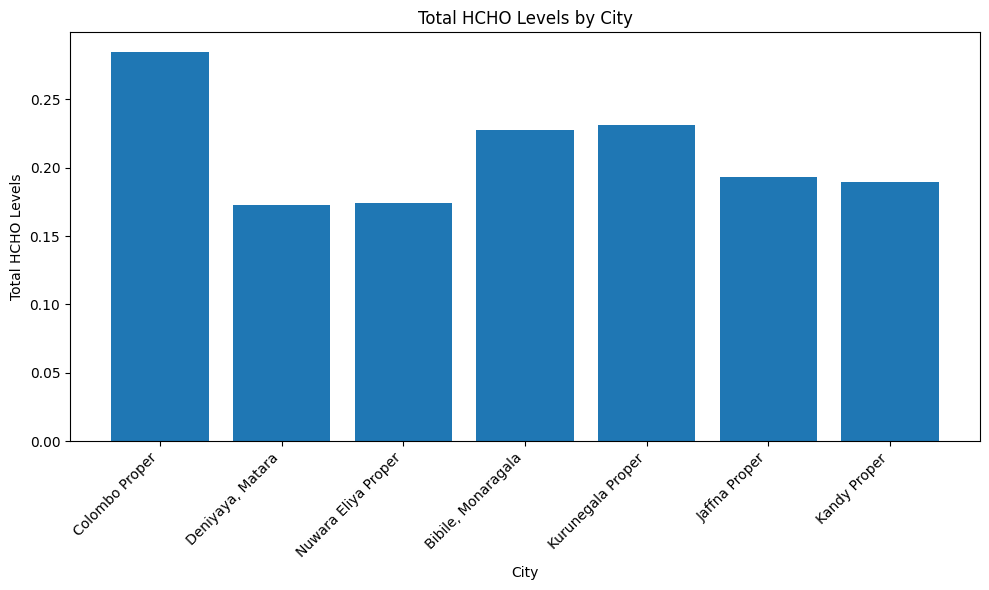

In [157]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
sum_hcho_levels_pd = sum_hcho_levels_df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(sum_hcho_levels_pd['Location'], sum_hcho_levels_pd['Total HCHO Levels'])
plt.xlabel('City')
plt.ylabel('Total HCHO Levels')
plt.title('Total HCHO Levels by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [158]:
from functools import reduce
from pyspark.sql import functions as F

# List of DataFrames for all cities
city_dfs = [colombo_df, deniyaya_matara_df, nuwara_eliya_df, bibile_monaragala_df, kurunegala_df, jaffna_df, kandy_df]

# Join all city DataFrames into a single DataFrame
all_cities_df = reduce(lambda df1, df2: df1.union(df2), city_dfs)

# Extract the year from the date column
all_cities_df = all_cities_df.withColumn('Year', F.year('Current Date'))

# Group by 'Location' and 'Year' and sum the 'HCHO reading' column
sum_hcho_levels_year_df = all_cities_df.groupBy('Location', 'Year').agg(F.sum('HCHO reading').alias('Total HCHO Levels'))

# Show the DataFrame with the sum of HCHO levels for each city per year
sum_hcho_levels_year_df.show()


+-------------------+----+--------------------+
|           Location|Year|   Total HCHO Levels|
+-------------------+----+--------------------+
|     Colombo Proper|2023| 0.05661984540561756|
|     Colombo Proper|2019| 0.05809185266101673|
|     Colombo Proper|2021|0.054821675476725756|
|     Colombo Proper|2022| 0.05571939810275982|
|     Colombo Proper|2020| 0.05945467991300115|
|   Deniyaya, Matara|2020|0.038654873445266774|
|   Deniyaya, Matara|2022|0.035706664595138105|
|   Deniyaya, Matara|2021|0.029409212754885224|
|   Deniyaya, Matara|2023| 0.03230184721244492|
|   Deniyaya, Matara|2019| 0.03642617530547325|
|Nuwara Eliya Proper|2023|0.038754660946730655|
|Nuwara Eliya Proper|2022|0.035786455222650816|
|Nuwara Eliya Proper|2020|0.031124916335216524|
|Nuwara Eliya Proper|2019| 0.03541680067105587|
|Nuwara Eliya Proper|2021|0.032853108894674056|
| Bibile, Monaragala|2023|0.045252661952555916|
| Bibile, Monaragala|2022| 0.04799686819350309|
| Bibile, Monaragala|2019|0.044514078830

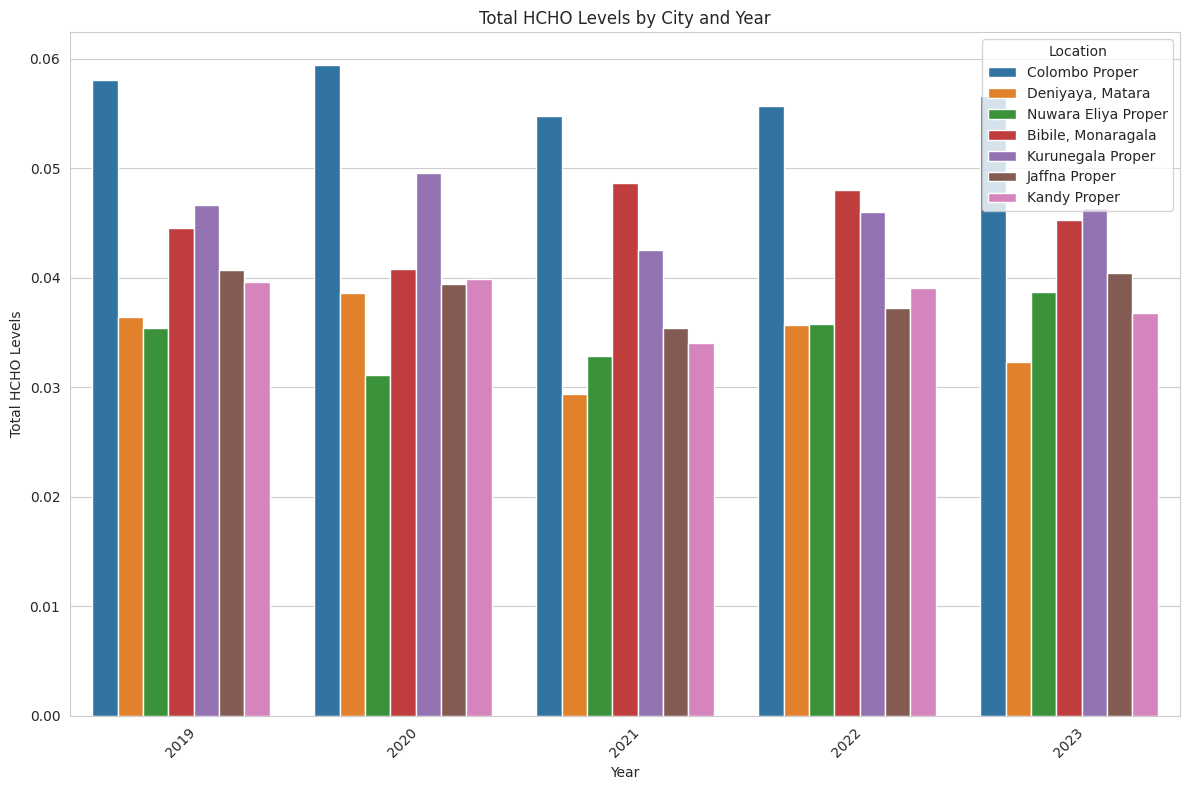

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
sum_hcho_levels_year_pd = sum_hcho_levels_year_df.toPandas()

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(12, 8))

# Use Seaborn's barplot to plot the data
sns.barplot(data=sum_hcho_levels_year_pd, x='Year', y='Total HCHO Levels', hue='Location', dodge=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total HCHO Levels')
plt.title('Total HCHO Levels by City and Year')

# Show the plot
plt.tight_layout()
plt.show()


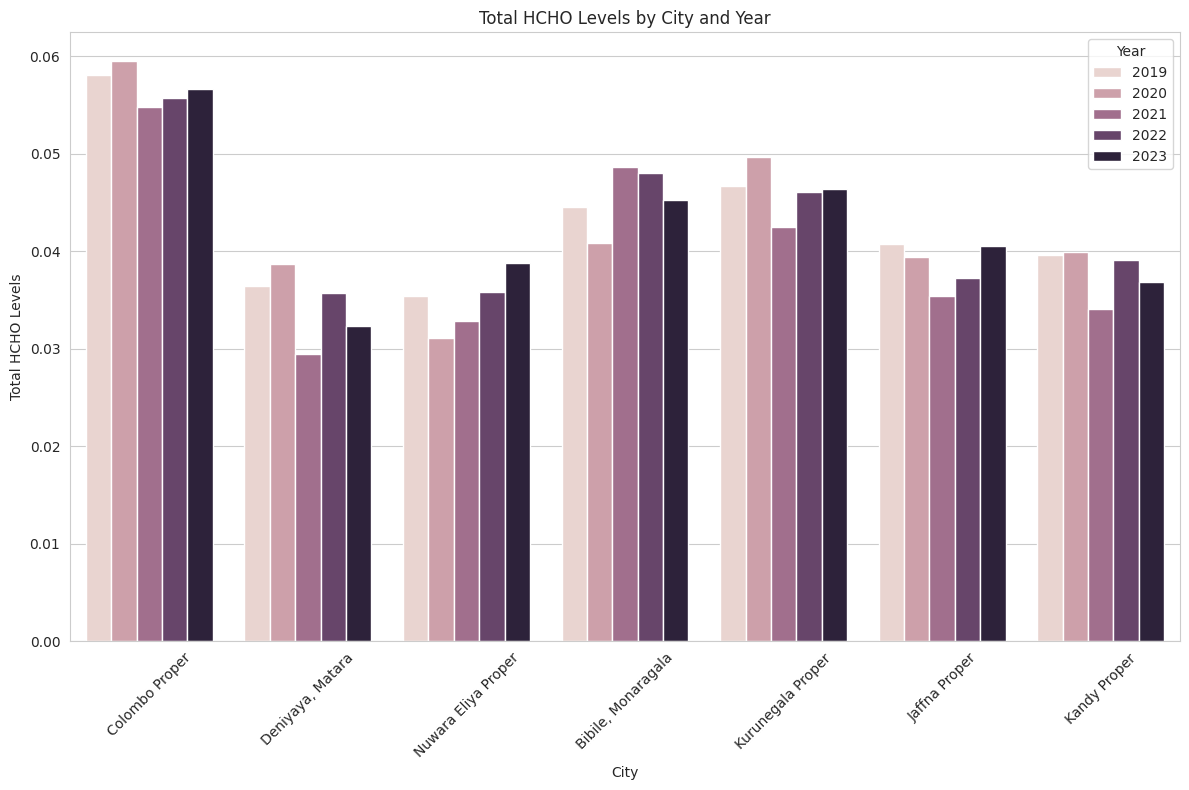

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
sum_hcho_levels_year_pd = sum_hcho_levels_year_df.toPandas()

# Set the style of the plot
sns.set_style("whitegrid")

# Define the order of cities and years
city_order = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper', 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper', 'Kandy Proper']
year_order = sorted(sum_hcho_levels_year_pd['Year'].unique())

# Plot the data
plt.figure(figsize=(12, 8))

# Use Seaborn's barplot to plot the data
sns.barplot(data=sum_hcho_levels_year_pd, x='Location', y='Total HCHO Levels', hue='Year', hue_order=year_order, dodge=True, order=city_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total HCHO Levels')
plt.title('Total HCHO Levels by City and Year')

# Show the plot
plt.tight_layout()
plt.show()


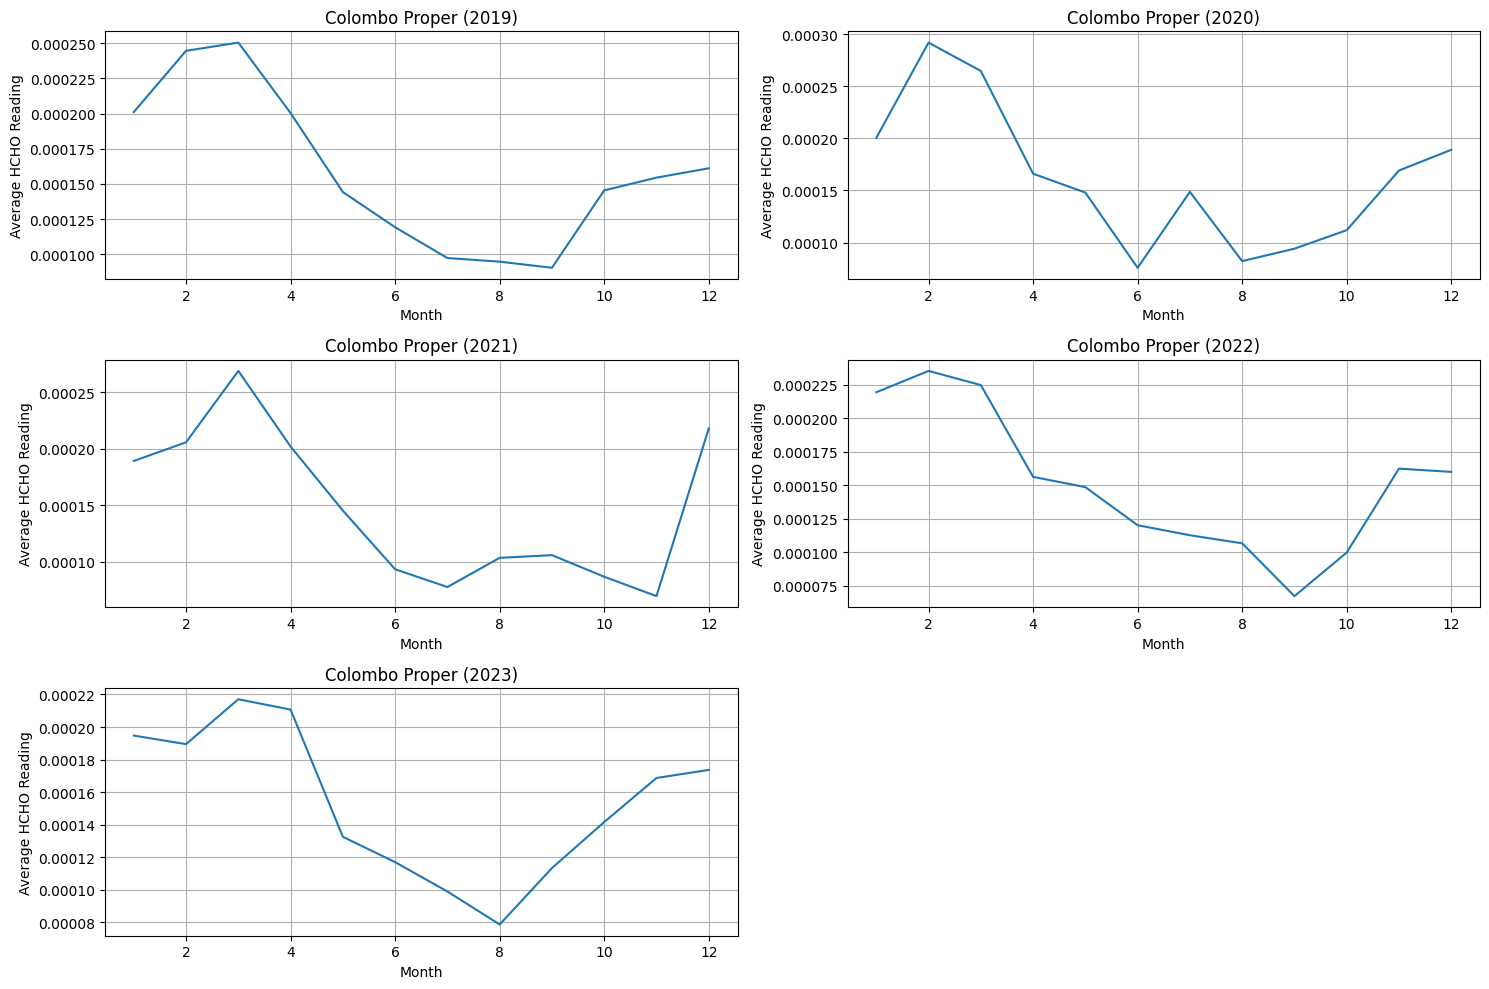

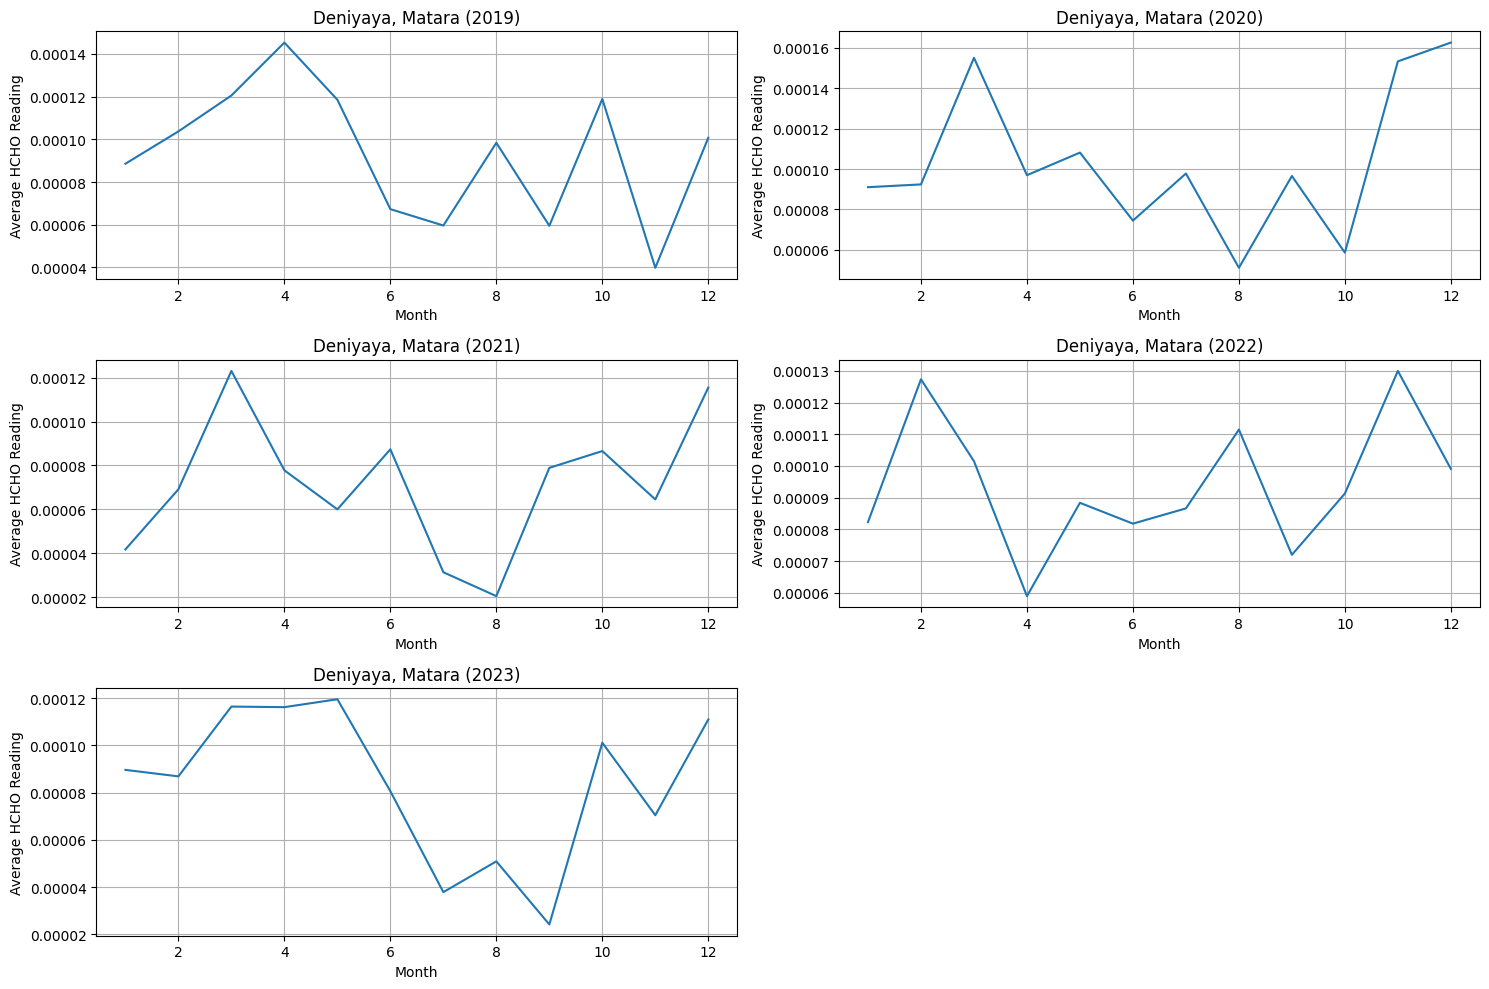

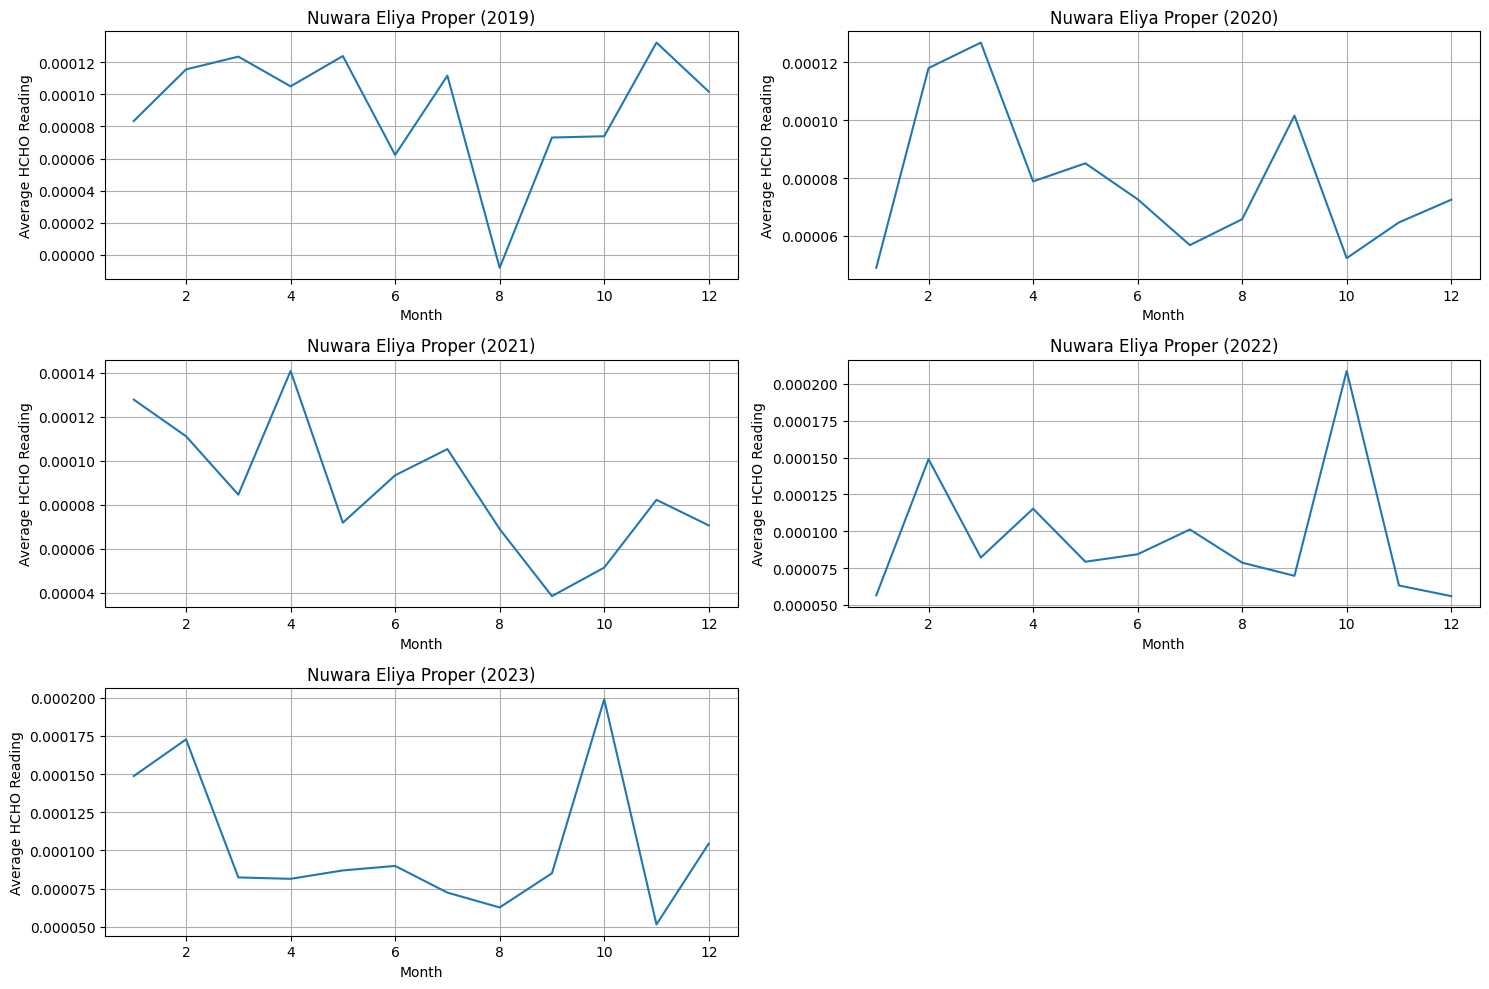

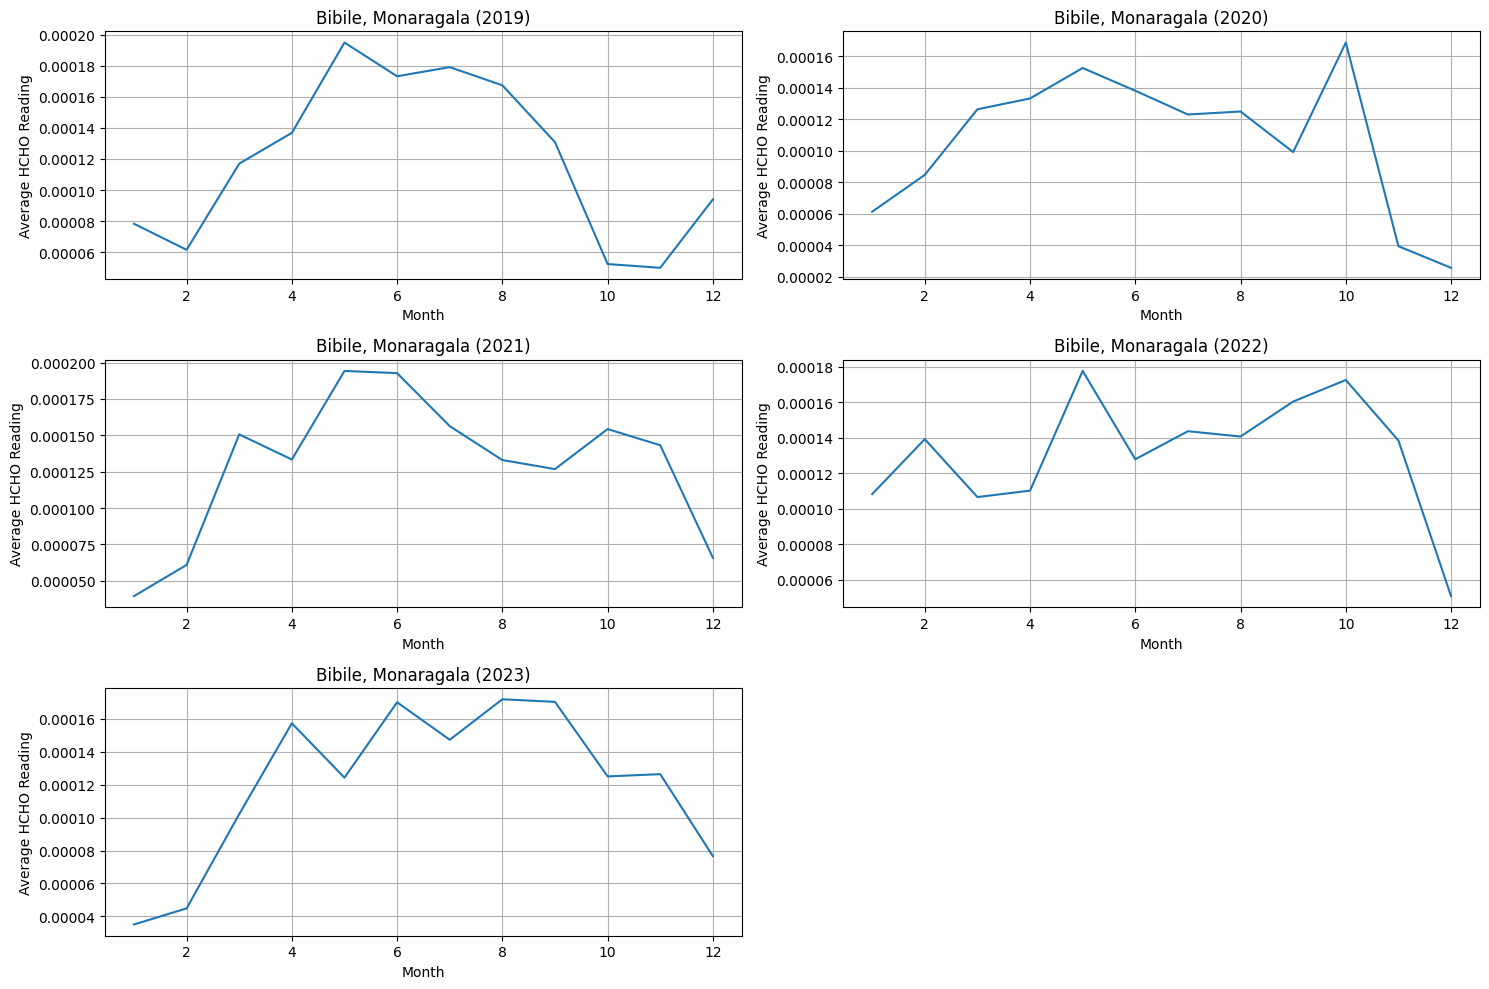

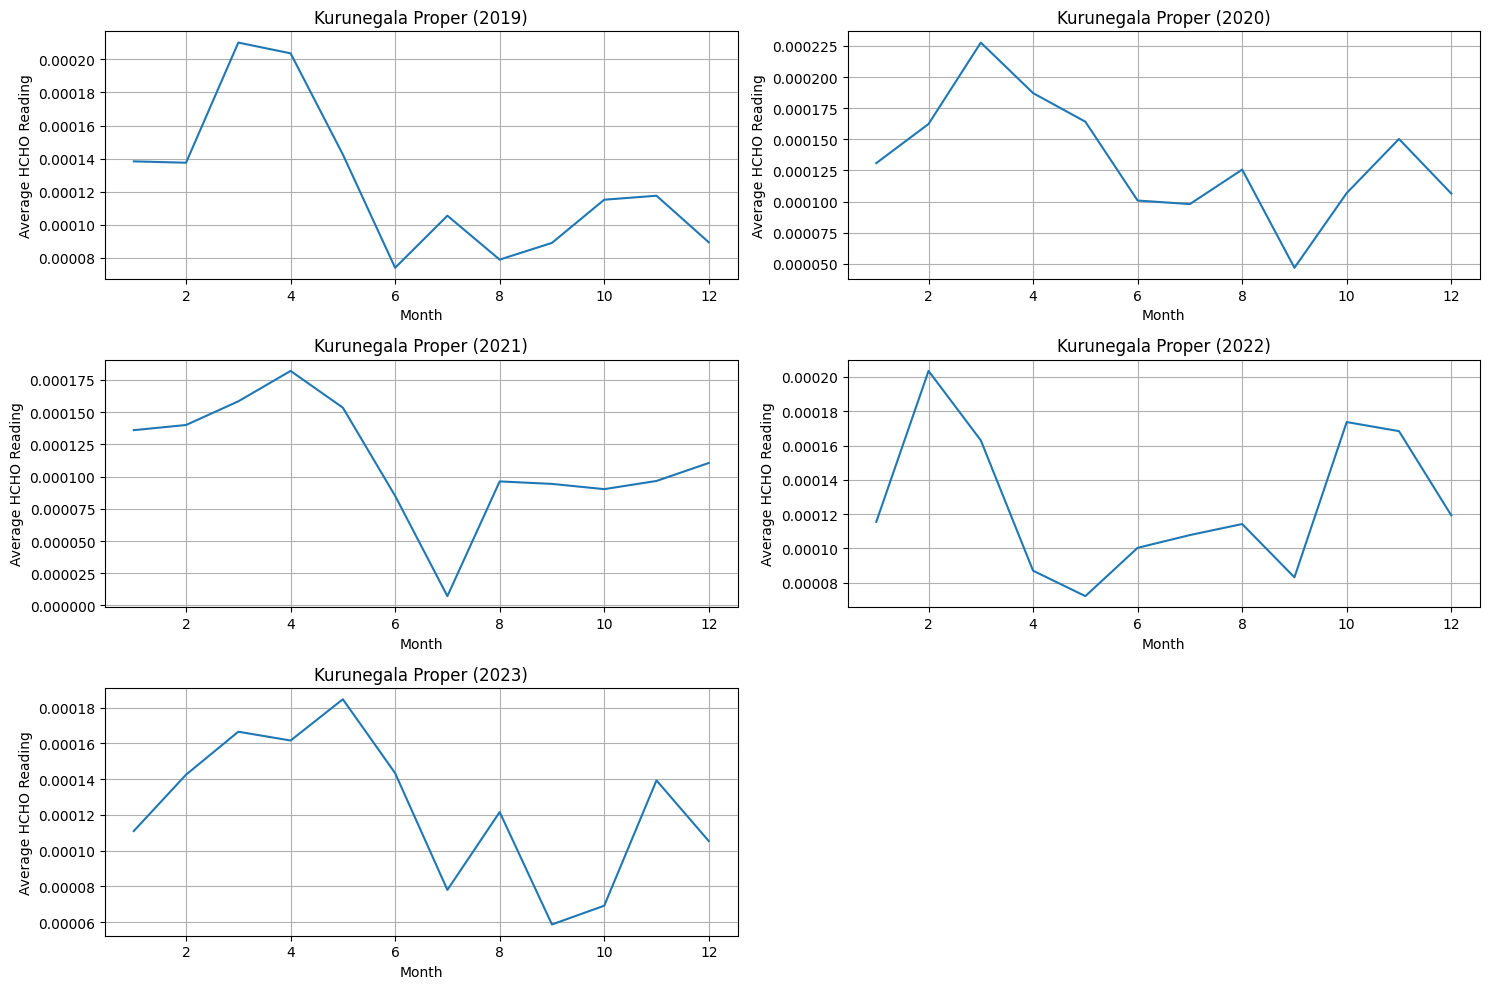

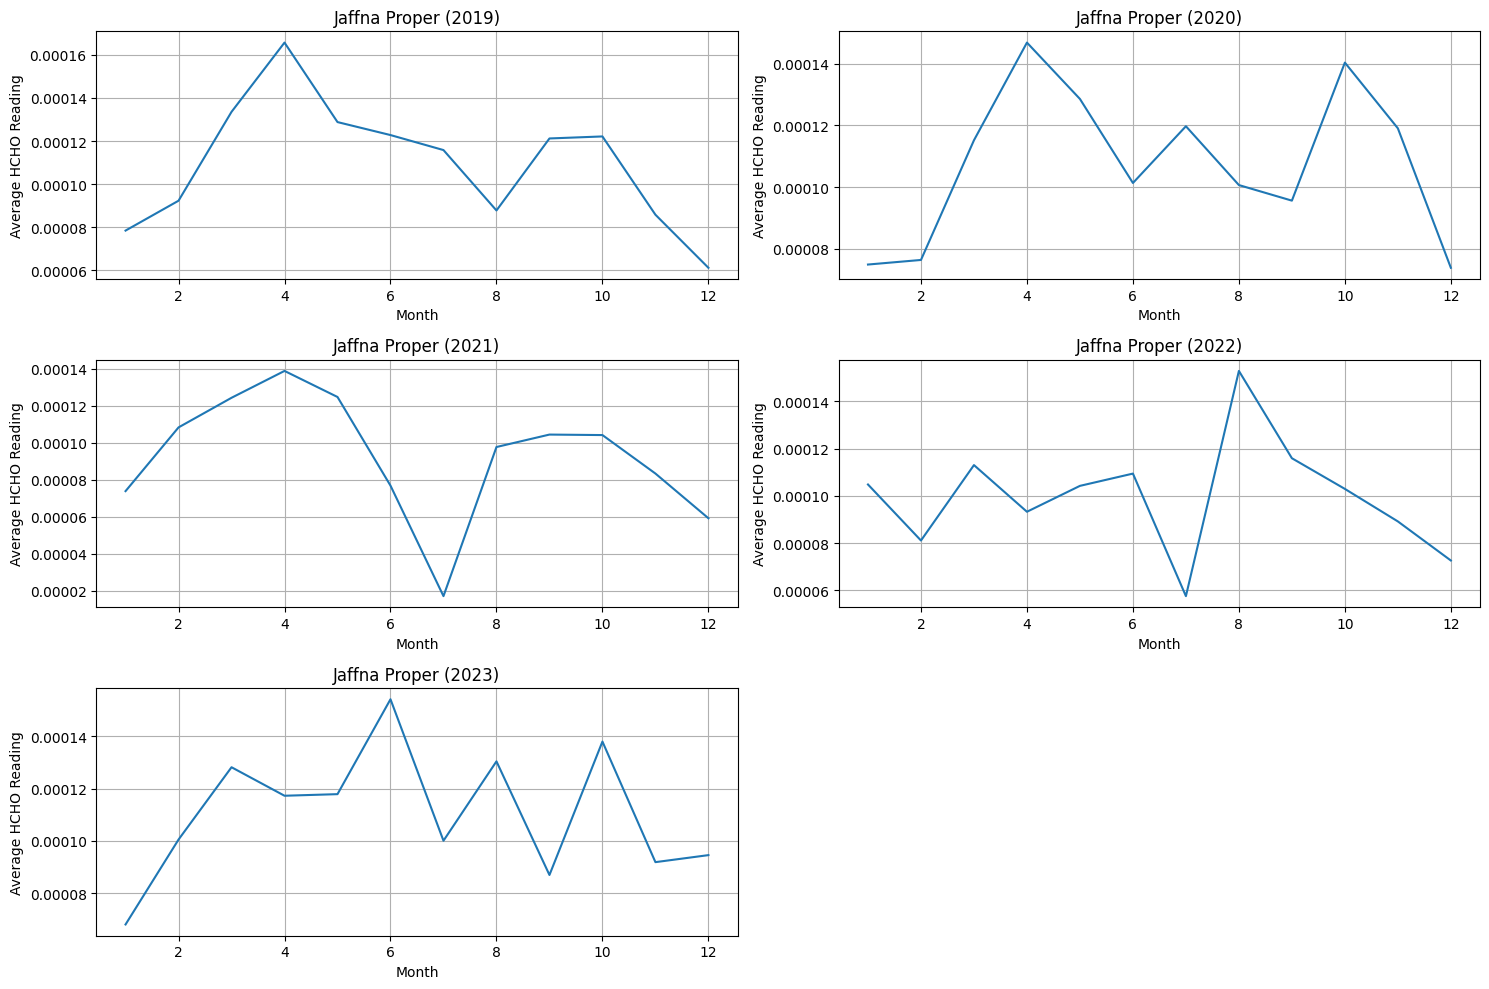

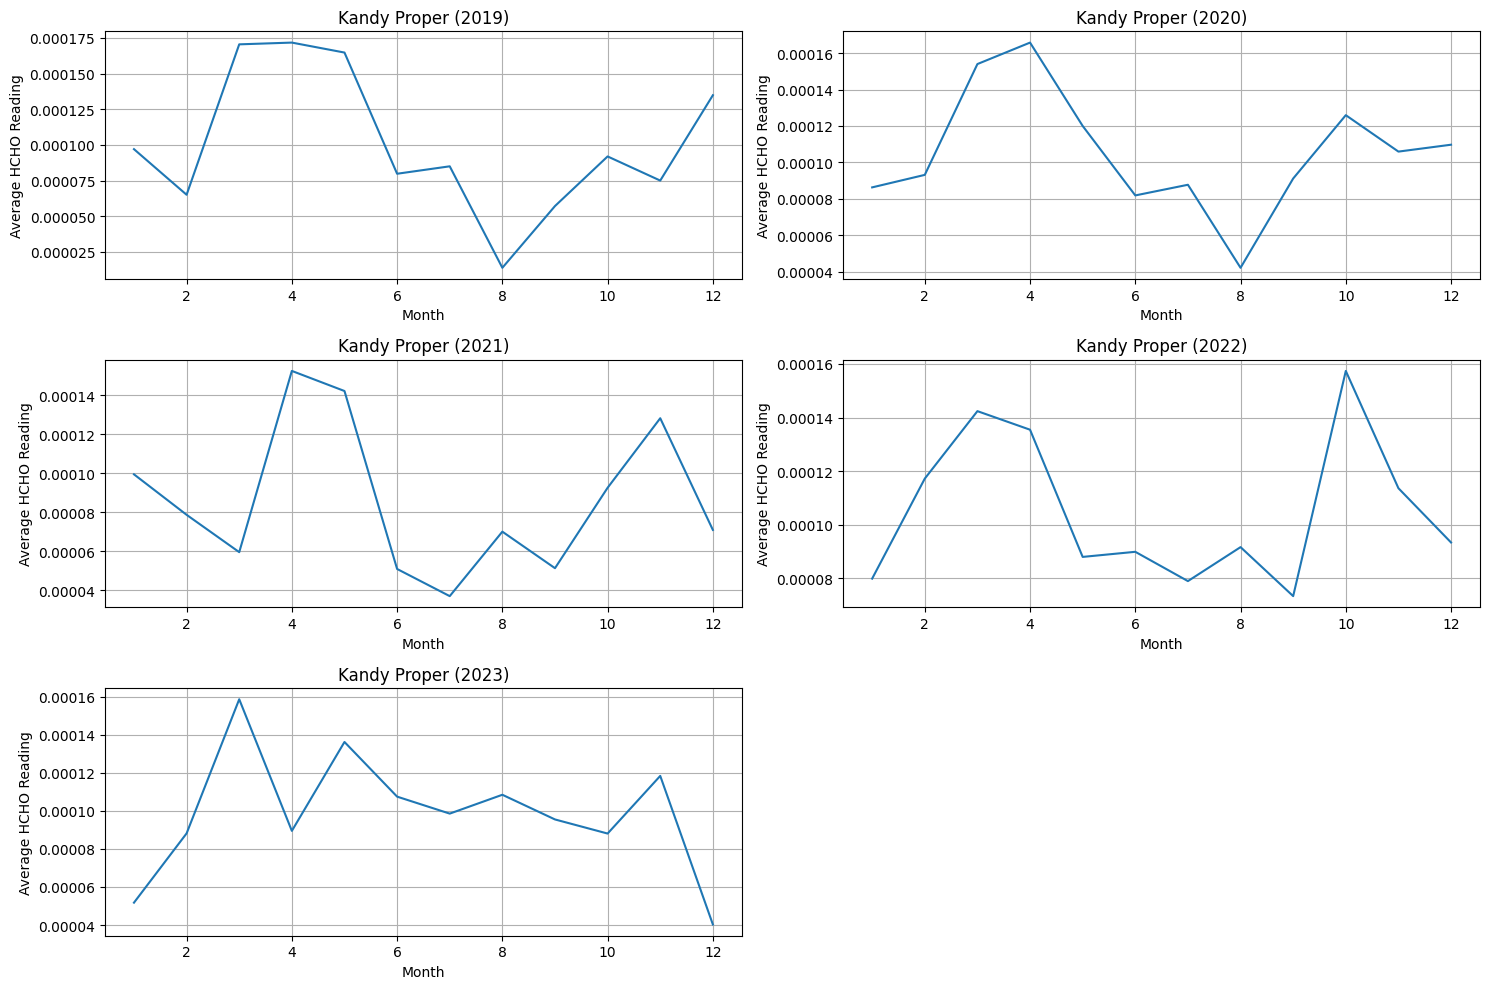

In [ ]:
from pyspark.sql.functions import year, month
import matplotlib.pyplot as plt

# Extract year and month from the date column
city_dfs_with_year_month = [city_df.withColumn('Year', year('Current Date')).withColumn('Month', month('Current Date')) for city_df in city_dfs]

# Group by city, year, and month and calculate the average HCHO reading
average_hcho_by_city_year_month = [city_df.groupBy('Location', 'Year', 'Month').avg('HCHO reading').orderBy('Year', 'Month').toPandas() for city_df in city_dfs_with_year_month]

# Plot average HCHO readings over time for each city and year in separate subplots
for city_df, city_name in zip(average_hcho_by_city_year_month, [city_df.select('Location').first()[0] for city_df in city_dfs]):
    unique_years = city_df['Year'].unique()
    num_years = len(unique_years)
    num_rows = (num_years + 1) // 2  # Adjust this if needed
    num_cols = 2  # Adjust this if needed

    plt.figure(figsize=(15, 10))

    for i, year_val in enumerate(unique_years, 1):
        plt.subplot(num_rows, num_cols, i)
        year_data = city_df[city_df['Year'] == year_val]
        plt.plot(year_data['Month'], year_data['avg(HCHO reading)'])
        plt.xlabel('Month')
        plt.ylabel('Average HCHO Reading')
        plt.title(f'{city_name} ({year_val})')  # Get city name and year
        plt.grid(True)

    plt.tight_layout()
    plt.show()


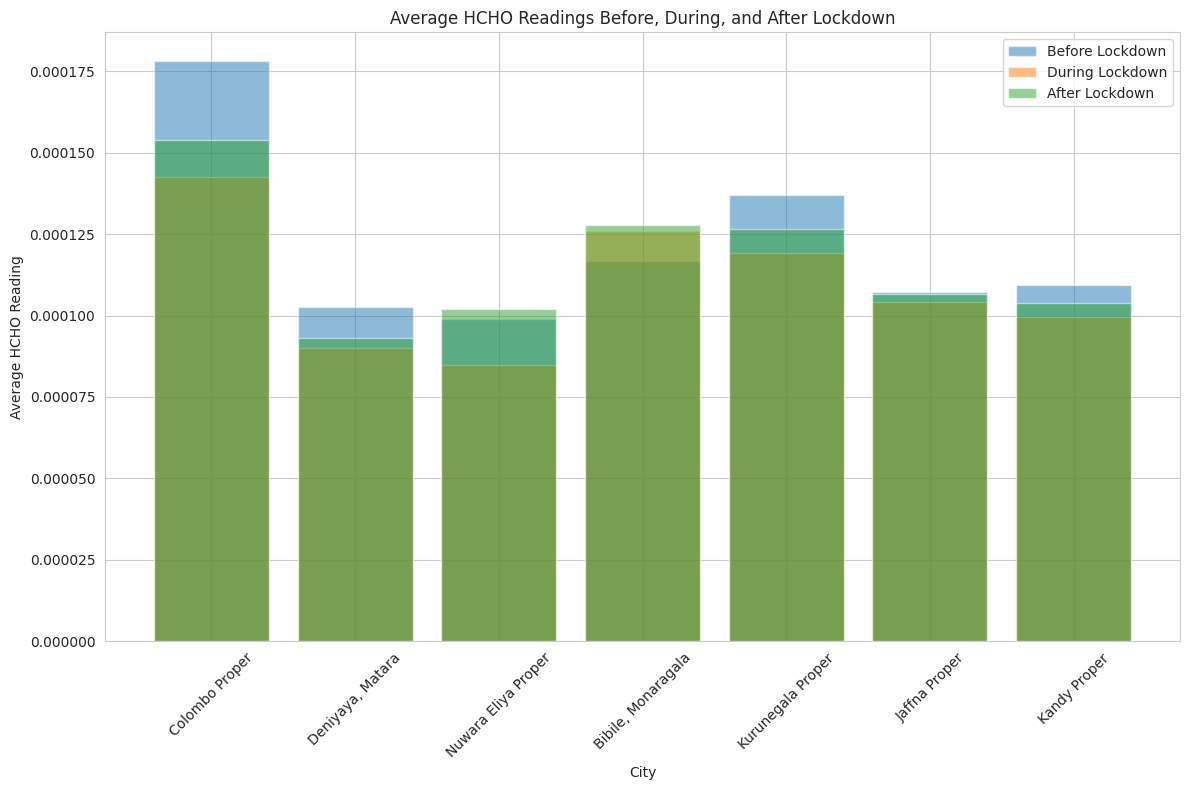

In [161]:
# Filter data for the COVID-19 lockdown period
lockdown_start_date = '2020-04-01'
lockdown_end_date = '2021-12-31'

city_dfs_lockdown_period = [city_df.filter((city_df['Current Date'] >= lockdown_start_date) & (city_df['Current Date'] <= lockdown_end_date)) for city_df in city_dfs]

# Calculate average HCHO readings during the lockdown period
average_hcho_lockdown = [df.selectExpr("avg(`HCHO reading`) as avg_hcho_lockdown").collect()[0]['avg_hcho_lockdown'] for df in city_dfs_lockdown_period]

# Calculate average HCHO readings before the lockdown
city_dfs_before_lockdown = [city_df.filter(city_df['Current Date'] < lockdown_start_date) for city_df in city_dfs]
average_hcho_before_lockdown = [df.selectExpr("avg(`HCHO reading`) as avg_hcho_before_lockdown").collect()[0]['avg_hcho_before_lockdown'] for df in city_dfs_before_lockdown]

# Calculate average HCHO readings after the lockdown
city_dfs_after_lockdown = [city_df.filter(city_df['Current Date'] > lockdown_end_date) for city_df in city_dfs]
average_hcho_after_lockdown = [df.selectExpr("avg(`HCHO reading`) as avg_hcho_after_lockdown").collect()[0]['avg_hcho_after_lockdown'] for df in city_dfs_after_lockdown]

# Plot average HCHO readings before, during, and after the lockdown for each city
plt.figure(figsize=(12, 8))
plt.bar([city_df.select('Location').first()[0] for city_df in city_dfs], average_hcho_before_lockdown, label='Before Lockdown', alpha=0.5)
plt.bar([city_df.select('Location').first()[0] for city_df in city_dfs], average_hcho_lockdown, label='During Lockdown', alpha=0.5)
plt.bar([city_df.select('Location').first()[0] for city_df in city_dfs], average_hcho_after_lockdown, label='After Lockdown', alpha=0.5)
plt.xlabel('City')
plt.ylabel('Average HCHO Reading')
plt.title('Average HCHO Readings Before, During, and After Lockdown')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


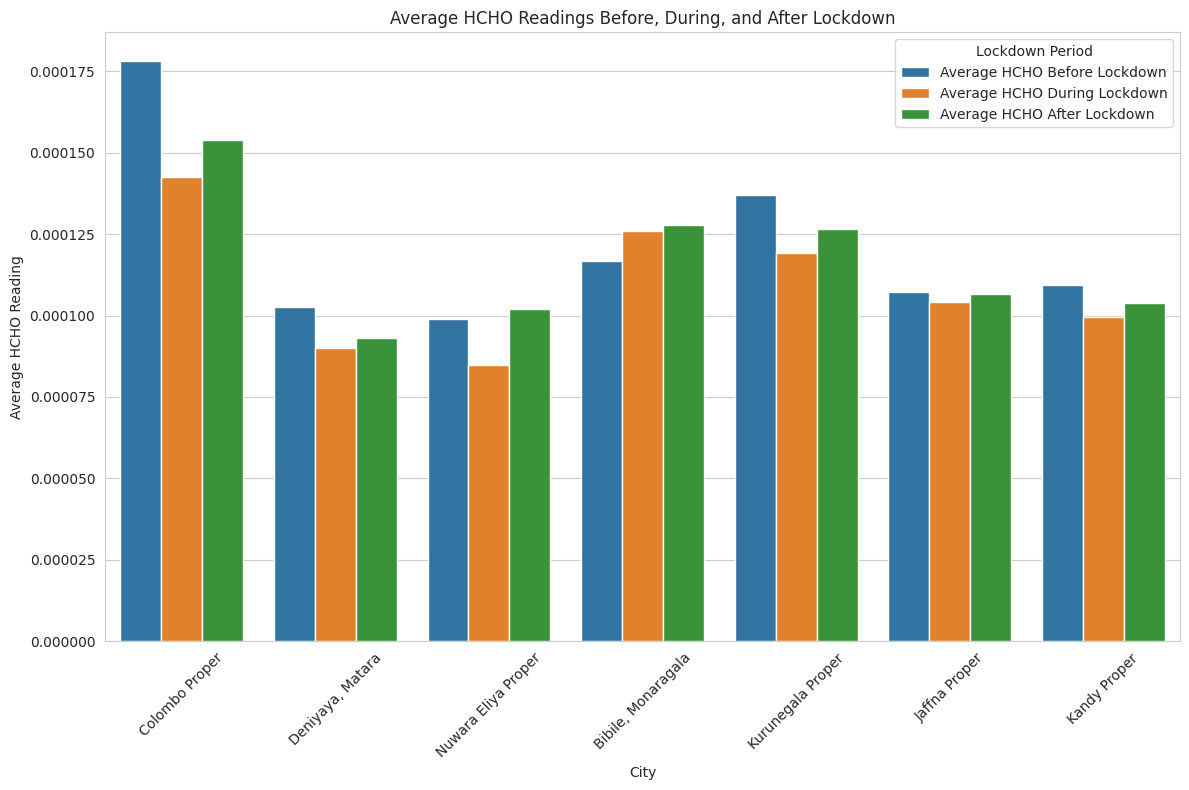

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data into a single DataFrame
lockdown_data = {
    'Location': [city_df.select('Location').first()[0] for city_df in city_dfs],
    'Average HCHO Before Lockdown': average_hcho_before_lockdown,
    'Average HCHO During Lockdown': average_hcho_lockdown,
    'Average HCHO After Lockdown': average_hcho_after_lockdown
}
lockdown_df = pd.DataFrame(lockdown_data)

# Melt the DataFrame to long format for easier plotting
lockdown_df_melted = lockdown_df.melt(id_vars=['Location'], var_name='Lockdown Period', value_name='Average HCHO Reading')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='Average HCHO Reading', hue='Lockdown Period', data=lockdown_df_melted)
plt.xlabel('City')
plt.ylabel('Average HCHO Reading')
plt.title('Average HCHO Readings Before, During, and After Lockdown')
plt.xticks(rotation=45)
plt.legend(title='Lockdown Period')
plt.tight_layout()
plt.show()


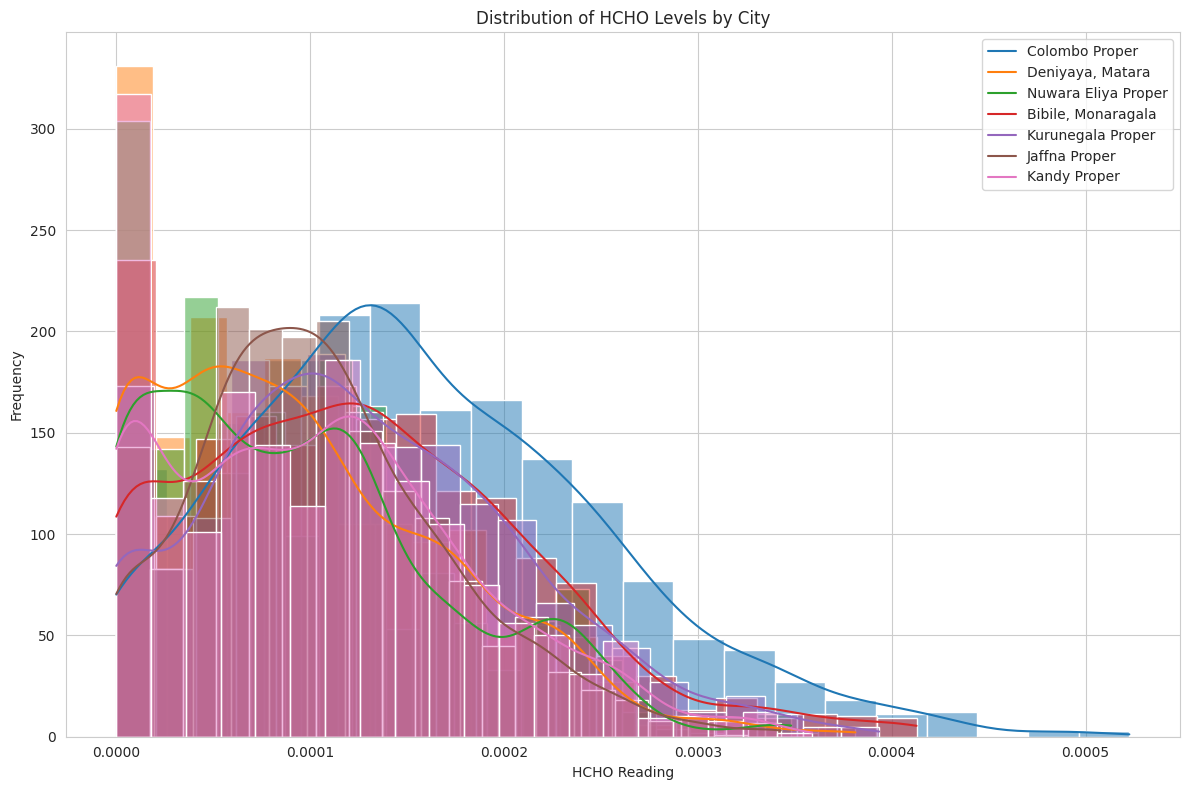

In [164]:
# Histograms
plt.figure(figsize=(12, 8))
for city_df in city_dfs:
    sns.histplot(data=city_df.toPandas(), x='HCHO reading', kde=True, alpha=0.5, bins=20)
plt.title('Distribution of HCHO Levels by City')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.legend([df.select('Location').first()[0] for df in city_dfs])
plt.tight_layout()
plt.show()



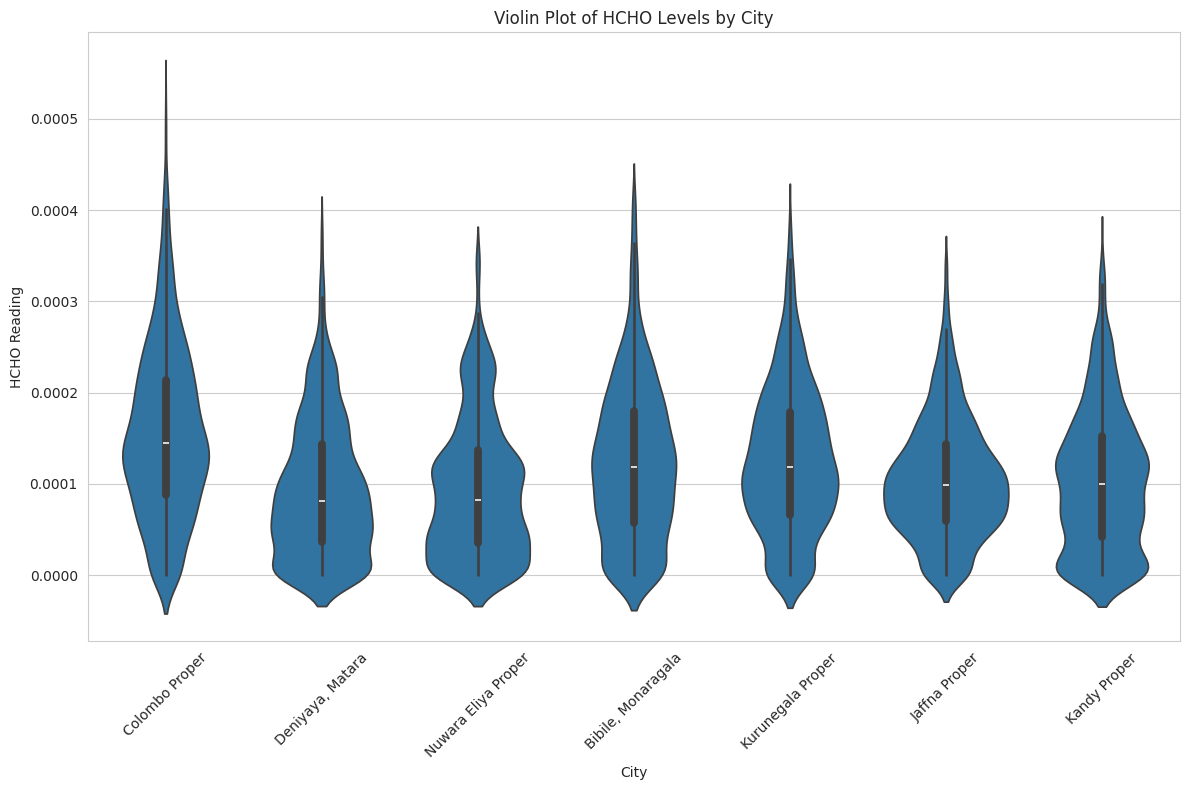

In [163]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=all_cities_df.toPandas(), x='Location', y='HCHO reading')
plt.title('Violin Plot of HCHO Levels by City')
plt.xlabel('City')
plt.ylabel('HCHO Reading')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Convert dates and hcho readings to DataFrame
df = pd.DataFrame({'Date': dates_list, 'HCHO Reading': hcho_readings_list})

# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create an interactive line plot with Plotly Express
fig = px.line(df, x='Date', y='HCHO Reading', title='Time Series of HCHO Readings for All Cities')

# Add buttons for different time ranges
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="1 Year", method="update", args=[{"visible": [True] * len(df)}]),
                dict(label="2 Years", method="update", args=[{"visible": [True] * len(df)}]),
                # Add more buttons for different time ranges as needed
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show plot
fig.show()


In [ ]:
city_names = ["Colombo Proper", "Deniyaya Matara", "Nuwara Eliya Proper","Bibile Monaragala","Kurunegala Proper","Jaffna Proper","Kandy Proper"]

In [ ]:
prep_temp = spark.read.csv("/content/drive/MyDrive/data engineering CW/data,prep,temp.csv",header = True)

In [ ]:
prep_temp.show()

+-----------+--------------+----------+----+----+----+----+
|    STATION|          NAME|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------+--------------+----------+----+----+----+----+
|CEM00043441|KURUNEGALA, CE|2019-01-02|0.00|  78|NULL|  72|
|CEM00043441|KURUNEGALA, CE|2019-01-03|0.00|  81|  87|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-04|0.00|  83|  88|  69|
|CEM00043441|KURUNEGALA, CE|2019-01-05|0.00|  84|  90|  65|
|CEM00043441|KURUNEGALA, CE|2019-01-06|0.00|  82|  88|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-07|0.00|  80|  89|  68|
|CEM00043441|KURUNEGALA, CE|2019-01-08|0.00|  82|  90|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-09|0.00|  83|  89|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-10|0.00|  81|  88|  72|
|CEM00043441|KURUNEGALA, CE|2019-01-11|0.00|  85|  90|  73|
|CEM00043441|KURUNEGALA, CE|2019-01-12|0.00|  84|  90|  74|
|CEM00043441|KURUNEGALA, CE|2019-01-13|0.00|  82|  87|  72|
|CEM00043441|KURUNEGALA, CE|2019-01-14|0.00|  80|  86|  74|
|CEM00043441|KURUNEGALA, CE|2019-01-15|0

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Define a list of column names
column_names = prep_temp.columns

# Count null values for each column
null_counts = prep_temp.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in column_names])

# Show the null value counts
null_counts.show()


+-------+----+----+----+----+----+----+
|STATION|NAME|DATE|PRCP|TAVG|TMAX|TMIN|
+-------+----+----+----+----+----+----+
|      0|   0|   0|  17|   0| 584| 928|
+-------+----+----+----+----+----+----+



In [ ]:
# Select relevant columns and drop TMAX and TMIN
prep_temp = prep_temp.select("NAME", "DATE", "PRCP", "TAVG")


# Fill null values in 'PRCP' column using forward fill
windowSpec = Window.orderBy("DATE").rowsBetween(Window.unboundedPreceding, 0)
prep_temp = prep_temp.withColumn("PRCP", last("PRCP", True).over(windowSpec))


In [ ]:
prep_temp.show()

+----------------+----------+----+----+
|            NAME|      DATE|PRCP|TAVG|
+----------------+----------+----+----+
|     COLOMBO, CE|2019-01-01|0.00|  81|
|NUWARA ELIYA, CE|2019-01-01|0.00|  61|
|  KURUNEGALA, CE|2019-01-02|0.00|  78|
|     COLOMBO, CE|2019-01-02|0.00|  78|
|NUWARA ELIYA, CE|2019-01-02|0.00|  59|
|  KURUNEGALA, CE|2019-01-03|0.00|  81|
|     COLOMBO, CE|2019-01-03|0.00|  81|
|NUWARA ELIYA, CE|2019-01-03|0.00|  59|
|  KURUNEGALA, CE|2019-01-04|0.00|  83|
|     COLOMBO, CE|2019-01-04|0.00|  81|
|NUWARA ELIYA, CE|2019-01-04|0.00|  59|
|  KURUNEGALA, CE|2019-01-05|0.00|  84|
|     COLOMBO, CE|2019-01-05|0.00|  81|
|NUWARA ELIYA, CE|2019-01-05|0.00|  55|
|  KURUNEGALA, CE|2019-01-06|0.00|  82|
|     COLOMBO, CE|2019-01-06|0.00|  81|
|NUWARA ELIYA, CE|2019-01-06|0.00|  59|
|  KURUNEGALA, CE|2019-01-07|0.00|  80|
|     COLOMBO, CE|2019-01-07|0.00|  81|
|NUWARA ELIYA, CE|2019-01-07|0.00|  59|
+----------------+----------+----+----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Define a list of column names
column_names = prep_temp.columns

# Count null values for each column
null_counts = prep_temp.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in column_names])

# Show the null value counts
null_counts.show()

+----+----+----+----+
|NAME|DATE|PRCP|TAVG|
+----+----+----+----+
|   0|   0|   0|   0|
+----+----+----+----+



In [ ]:
# prompt: HOW TO CHECK THE DATATYPES OF THE COLUMNS IN prep_temp.CSV

prep_temp.printSchema()


root
 |-- NAME: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- PRCP: string (nullable = true)
 |-- TAVG: string (nullable = true)



In [ ]:
colombo_df.printSchema()

root
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)
 |-- HCHO reading: double (nullable = true)



In [ ]:
prep_temp.show()

+----------------+----------+----+----+
|            NAME|      DATE|PRCP|TAVG|
+----------------+----------+----+----+
|     COLOMBO, CE|2019-01-01|0.00|  81|
|NUWARA ELIYA, CE|2019-01-01|0.00|  61|
|  KURUNEGALA, CE|2019-01-02|0.00|  78|
|     COLOMBO, CE|2019-01-02|0.00|  78|
|NUWARA ELIYA, CE|2019-01-02|0.00|  59|
|  KURUNEGALA, CE|2019-01-03|0.00|  81|
|     COLOMBO, CE|2019-01-03|0.00|  81|
|NUWARA ELIYA, CE|2019-01-03|0.00|  59|
|  KURUNEGALA, CE|2019-01-04|0.00|  83|
|     COLOMBO, CE|2019-01-04|0.00|  81|
|NUWARA ELIYA, CE|2019-01-04|0.00|  59|
|  KURUNEGALA, CE|2019-01-05|0.00|  84|
|     COLOMBO, CE|2019-01-05|0.00|  81|
|NUWARA ELIYA, CE|2019-01-05|0.00|  55|
|  KURUNEGALA, CE|2019-01-06|0.00|  82|
|     COLOMBO, CE|2019-01-06|0.00|  81|
|NUWARA ELIYA, CE|2019-01-06|0.00|  59|
|  KURUNEGALA, CE|2019-01-07|0.00|  80|
|     COLOMBO, CE|2019-01-07|0.00|  81|
|NUWARA ELIYA, CE|2019-01-07|0.00|  59|
+----------------+----------+----+----+
only showing top 20 rows



In [ ]:
# Define filtering conditions for each city
colombo_filter = col("NAME").contains("COLOMBO")
nuwara_eliya_filter = col("NAME").contains("NUWARA ELIYA")
kurunegala_filter = col("NAME").contains("KURUNEGALA")

# Apply filters to separate the dataset for each city
colombo_data = prep_temp.filter(colombo_filter)
nuwara_eliya_data = prep_temp.filter(nuwara_eliya_filter)
kurunegala_data = prep_temp.filter(kurunegala_filter)

In [ ]:
colombo_data.show()

nuwara_eliya_data.show()

kurunegala_data.show()

+-----------+----------+----+----+
|       NAME|      DATE|PRCP|TAVG|
+-----------+----------+----+----+
|COLOMBO, CE|2019-01-01|0.00|  81|
|COLOMBO, CE|2019-01-02|0.00|  78|
|COLOMBO, CE|2019-01-03|0.00|  81|
|COLOMBO, CE|2019-01-04|0.00|  81|
|COLOMBO, CE|2019-01-05|0.00|  81|
|COLOMBO, CE|2019-01-06|0.00|  81|
|COLOMBO, CE|2019-01-07|0.00|  81|
|COLOMBO, CE|2019-01-08|0.00|  82|
|COLOMBO, CE|2019-01-09|0.00|  83|
|COLOMBO, CE|2019-01-10|0.00|  82|
|COLOMBO, CE|2019-01-11|0.00|  82|
|COLOMBO, CE|2019-01-12|0.00|  82|
|COLOMBO, CE|2019-01-13|0.00|  82|
|COLOMBO, CE|2019-01-14|0.52|  82|
|COLOMBO, CE|2019-01-15|0.06|  81|
|COLOMBO, CE|2019-01-16|0.00|  82|
|COLOMBO, CE|2019-01-17|0.00|  79|
|COLOMBO, CE|2019-01-18|0.00|  79|
|COLOMBO, CE|2019-01-19|0.00|  78|
|COLOMBO, CE|2019-01-20|0.00|  79|
+-----------+----------+----+----+
only showing top 20 rows

+----------------+----------+----+----+
|            NAME|      DATE|PRCP|TAVG|
+----------------+----------+----+----+
|NUWARA ELIYA,

In [ ]:
from pyspark.sql.functions import col, expr


# Standardize location names
# Assuming you want to match based on the city name
prep_temp = prep_temp.withColumn("Location_Name", expr("substring_index(NAME, ',', 1)"))



In [ ]:
prep_temp.show()

+----------------+----------+----+----+-------------+
|            NAME|      DATE|PRCP|TAVG|Location_Name|
+----------------+----------+----+----+-------------+
|     COLOMBO, CE|2019-01-01|0.00|  81|      COLOMBO|
|NUWARA ELIYA, CE|2019-01-01|0.00|  61| NUWARA ELIYA|
|  KURUNEGALA, CE|2019-01-02|0.00|  78|   KURUNEGALA|
|     COLOMBO, CE|2019-01-02|0.00|  78|      COLOMBO|
|NUWARA ELIYA, CE|2019-01-02|0.00|  59| NUWARA ELIYA|
|  KURUNEGALA, CE|2019-01-03|0.00|  81|   KURUNEGALA|
|     COLOMBO, CE|2019-01-03|0.00|  81|      COLOMBO|
|NUWARA ELIYA, CE|2019-01-03|0.00|  59| NUWARA ELIYA|
|  KURUNEGALA, CE|2019-01-04|0.00|  83|   KURUNEGALA|
|     COLOMBO, CE|2019-01-04|0.00|  81|      COLOMBO|
|NUWARA ELIYA, CE|2019-01-04|0.00|  59| NUWARA ELIYA|
|  KURUNEGALA, CE|2019-01-05|0.00|  84|   KURUNEGALA|
|     COLOMBO, CE|2019-01-05|0.00|  81|      COLOMBO|
|NUWARA ELIYA, CE|2019-01-05|0.00|  55| NUWARA ELIYA|
|  KURUNEGALA, CE|2019-01-06|0.00|  82|   KURUNEGALA|
|     COLOMBO, CE|2019-01-06

In [ ]:
prep_temp.printSchema()

root
 |-- NAME: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- PRCP: string (nullable = true)
 |-- TAVG: string (nullable = true)
 |-- Location_Name: string (nullable = true)



In [ ]:
from pyspark.sql.functions import to_date, date_format, lower


# Lowercase the 'NAME' column in prep_temp for case-insensitive matching
prep_temp = prep_temp.withColumn("Location_correct", lower(prep_temp["Location_Name"]))

# Define a function to merge the data based on city names and dates
def merge_data(df, prep_temp):

    # Lowercase the 'Location' column in df for case-insensitive matching
    df = df.withColumn("Location", lower(df["Location"]))

    # Merge based on the "NAME" column and the common DATE
    # Join the DataFrames
    merged_data = df.join(prep_temp, lower(df["Location"]).contains(prep_temp["Location_correct"]) & (df["Current Date"] == prep_temp["DATE"]), "inner")

    # Drop the additional Location column from prep_temp
    merged_data = merged_data.drop("Location_correct","Next Date","NAME","DATE","Location_Name")

    return merged_data

In [ ]:
colombo_combined = merge_data(colombo_df,prep_temp)
colombo_combined.show()

+--------------+------------+--------------------+----+----+
|      Location|Current Date|        HCHO reading|PRCP|TAVG|
+--------------+------------+--------------------+----+----+
|colombo proper|  2019-01-01|1.969834395781014...|0.00|  81|
|colombo proper|  2019-01-02|2.625522171968594...|0.00|  78|
|colombo proper|  2019-01-03|9.852118897938794E-5|0.00|  81|
|colombo proper|  2019-01-04|2.099320518114242E-4|0.00|  81|
|colombo proper|  2019-01-05|1.785337298892930...|0.00|  81|
|colombo proper|  2019-01-06|1.082296700235670...|0.00|  81|
|colombo proper|  2019-01-07|3.926829280477309...|0.00|  81|
|colombo proper|  2019-01-08|9.153156350685351E-5|0.00|  82|
|colombo proper|  2019-01-09|1.205978992853015...|0.00|  83|
|colombo proper|  2019-01-10|1.297723562983258...|0.00|  82|
|colombo proper|  2019-01-11|2.239188166801278...|0.00|  82|
|colombo proper|  2019-01-12|1.569418094178759...|0.00|  82|
|colombo proper|  2019-01-13|1.569418094178759...|0.00|  82|
|colombo proper|  2019-0

In [ ]:
nuwara_eliya_combined = merge_data(nuwara_eliya_df,prep_temp)

In [ ]:
kurunegala_combined= merge_data(kurunegala_df,prep_temp)

In [ ]:
nuwara_eliya_combined.show()
kurunegala_combined.show()

+-------------------+------------+--------------------+----+----+
|           Location|Current Date|        HCHO reading|PRCP|TAVG|
+-------------------+------------+--------------------+----+----+
|nuwara eliya proper|  2019-01-01|1.908293886956784...|0.00|  61|
|nuwara eliya proper|  2019-01-02|1.908293886956784...|0.00|  59|
|nuwara eliya proper|  2019-01-03|1.908293886956784...|0.00|  59|
|nuwara eliya proper|  2019-01-04|5.097625917127737...|0.00|  59|
|nuwara eliya proper|  2019-01-05|6.456645496655256E-5|0.00|  55|
|nuwara eliya proper|  2019-01-06|8.982348709518115E-5|0.00|  59|
|nuwara eliya proper|  2019-01-07|4.097797651418246E-5|0.00|  59|
|nuwara eliya proper|  2019-01-08|4.097797651418246E-5|0.00|  59|
|nuwara eliya proper|  2019-01-09|4.097797651418246E-5|0.00|  61|
|nuwara eliya proper|  2019-01-10|4.097797651418246E-5|0.00|  61|
|nuwara eliya proper|  2019-01-11|3.914670787137749E-5|0.00|  62|
|nuwara eliya proper|  2019-01-12|3.914670787137749E-5|0.07|  59|
|nuwara el

In [ ]:

row_count = nuwara_eliya_combined .count()


print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1750


In [ ]:

row_count = kurunegala_combined.count()


print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1686


In [ ]:

row_count = colombo_combined.count()


print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1752


In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, FloatType

# Convert PRCP and TAVG columns to IntegerType or FloatType
colombo_combined = colombo_combined.withColumn("PRCP", col("PRCP").cast(FloatType()))
colombo_combined = colombo_combined.withColumn("TAVG", col("TAVG").cast(FloatType()))


In [ ]:
from pyspark.sql.functions import corr

# Calculate correlation between HCHO reading and PRCP
correlation_hcho_prcp = colombo_combined.select(corr("HCHO reading", "PRCP")).collect()[0][0]

# Calculate correlation between HCHO reading and TAVG
correlation_hcho_tavg = colombo_combined.select(corr("HCHO reading", "TAVG")).collect()[0][0]

# Calculate correlation between PRCP and TAVG
correlation_prcp_tavg = colombo_combined.select(corr("PRCP", "TAVG")).collect()[0][0]

print("Correlation between HCHO reading and PRCP:", correlation_hcho_prcp)
print("Correlation between HCHO reading and TAVG:", correlation_hcho_tavg)
print("Correlation between PRCP and TAVG:", correlation_prcp_tavg)





Correlation between HCHO reading and PRCP: -0.10281201873822511
Correlation between HCHO reading and TAVG: -0.035085596109368636
Correlation between PRCP and TAVG: -0.3668901456149465


In [ ]:
from pyspark.sql.functions import corr

# Calculate correlation between HCHO reading and PRCP
correlation_hcho_prcp = nuwara_eliya_combined.select(corr("HCHO reading", "PRCP")).collect()[0][0]

# Calculate correlation between HCHO reading and TAVG
correlation_hcho_tavg = nuwara_eliya_combined.select(corr("HCHO reading", "TAVG")).collect()[0][0]

# Calculate correlation between PRCP and TAVG
correlation_prcp_tavg = nuwara_eliya_combined.select(corr("PRCP", "TAVG")).collect()[0][0]

print("Correlation between HCHO reading and PRCP:", correlation_hcho_prcp)
print("Correlation between HCHO reading and TAVG:", correlation_hcho_tavg)
print("Correlation between PRCP and TAVG:", correlation_prcp_tavg)


Correlation between HCHO reading and PRCP: 0.012893138581094558
Correlation between HCHO reading and TAVG: 0.0022276667134083746
Correlation between PRCP and TAVG: -0.09705468204065451


In [ ]:
from pyspark.sql.functions import corr

# Calculate correlation between HCHO reading and PRCP
correlation_hcho_prcp = kurunegala_combined.select(corr("HCHO reading", "PRCP")).collect()[0][0]

# Calculate correlation between HCHO reading and TAVG
correlation_hcho_tavg = kurunegala_combined.select(corr("HCHO reading", "TAVG")).collect()[0][0]

# Calculate correlation between PRCP and TAVG
correlation_prcp_tavg = kurunegala_combined.select(corr("PRCP", "TAVG")).collect()[0][0]

print("Correlation between HCHO reading and PRCP:", correlation_hcho_prcp)
print("Correlation between HCHO reading and TAVG:", correlation_hcho_tavg)
print("Correlation between PRCP and TAVG:", correlation_prcp_tavg)


Correlation between HCHO reading and PRCP: -0.0202698871180268
Correlation between HCHO reading and TAVG: 0.18589956041650718
Correlation between PRCP and TAVG: -0.26942464671245153


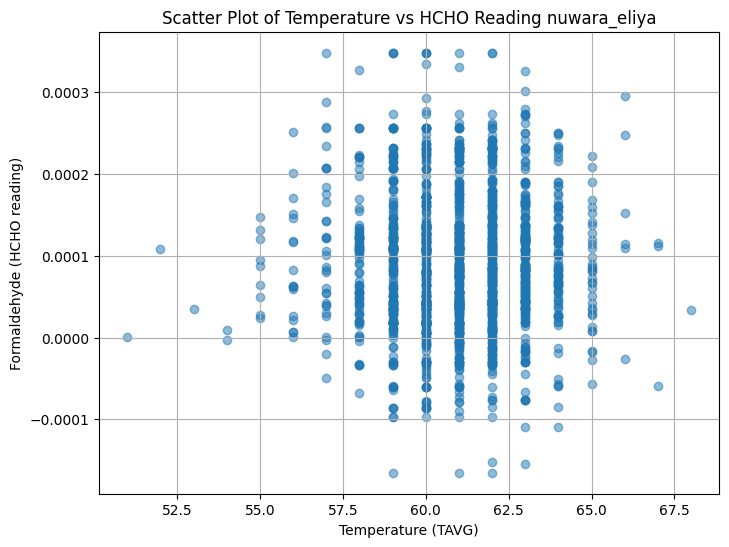

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns for temperature and HCHO reading
temperature = nuwara_eliya_combined.select("TAVG").collect()
hcho_reading = nuwara_eliya_combined.select("HCHO reading").collect()

# Convert the collected data to lists
temperature = [float(row["TAVG"]) for row in temperature]
hcho_reading = [float(row["HCHO reading"]) for row in hcho_reading]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temperature, hcho_reading, alpha=0.5)
plt.title("Scatter Plot of Temperature vs HCHO Reading nuwara_eliya")
plt.xlabel("Temperature (TAVG)")
plt.ylabel("Formaldehyde (HCHO reading)")
plt.grid(True)
plt.show()


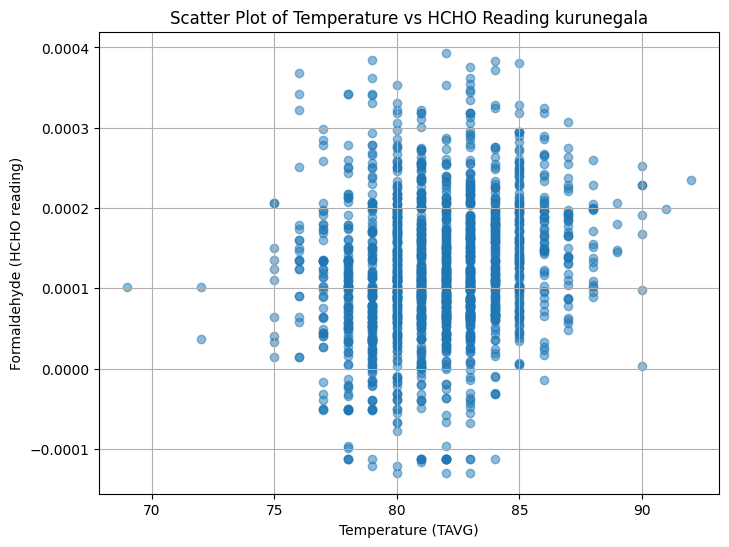

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns for temperature and HCHO reading
temperature = kurunegala_combined.select("TAVG").collect()
hcho_reading = kurunegala_combined.select("HCHO reading").collect()

# Convert the collected data to lists
temperature = [float(row["TAVG"]) for row in temperature]
hcho_reading = [float(row["HCHO reading"]) for row in hcho_reading]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temperature, hcho_reading, alpha=0.5)
plt.title("Scatter Plot of Temperature vs HCHO Reading kurunegala")
plt.xlabel("Temperature (TAVG)")
plt.ylabel("Formaldehyde (HCHO reading)")
plt.grid(True)
plt.show()


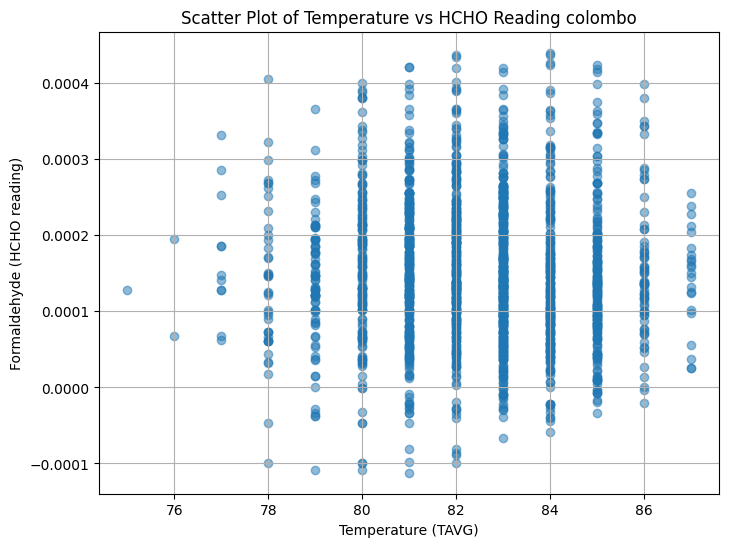

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns for temperature and HCHO reading
temperature = colombo_combined.select("TAVG").collect()
hcho_reading = colombo_combined.select("HCHO reading").collect()

# Convert the collected data to lists
temperature = [float(row["TAVG"]) for row in temperature]
hcho_reading = [float(row["HCHO reading"]) for row in hcho_reading]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temperature, hcho_reading, alpha=0.5)
plt.title("Scatter Plot of Temperature vs HCHO Reading colombo")
plt.xlabel("Temperature (TAVG)")
plt.ylabel("Formaldehyde (HCHO reading)")
plt.grid(True)
plt.show()


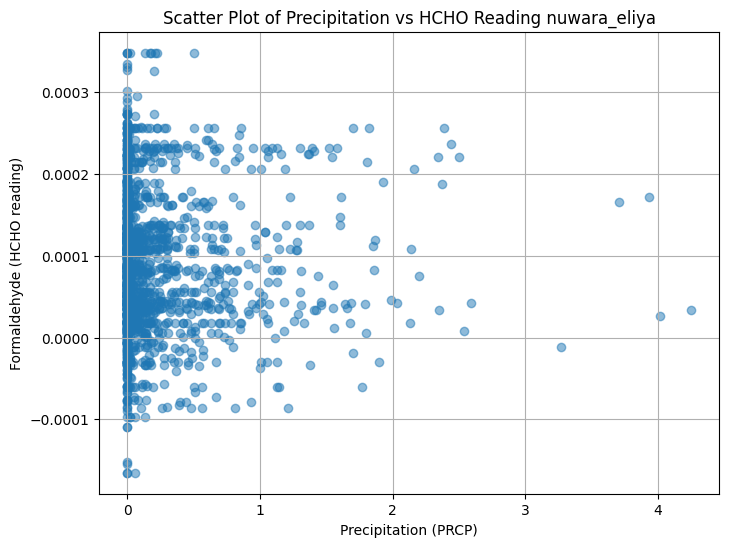

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns for precipitation and HCHO reading
precipitation = nuwara_eliya_combined.select("PRCP").collect()
hcho_reading = nuwara_eliya_combined.select("HCHO reading").collect()

# Convert the collected data to lists
precipitation = [float(row["PRCP"]) for row in precipitation]
hcho_reading = [float(row["HCHO reading"]) for row in hcho_reading]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(precipitation, hcho_reading, alpha=0.5)
plt.title("Scatter Plot of Precipitation vs HCHO Reading nuwara_eliya")
plt.xlabel("Precipitation (PRCP)")
plt.ylabel("Formaldehyde (HCHO reading)")
plt.grid(True)
plt.show()


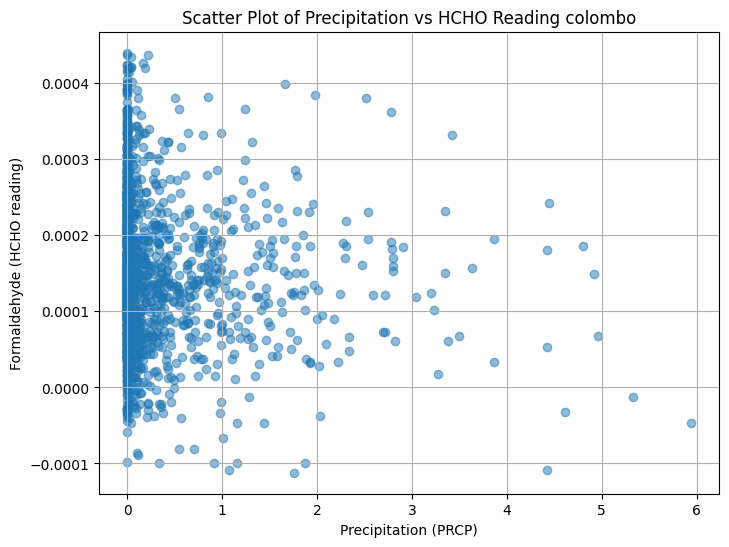

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns for precipitation and HCHO reading
precipitation = colombo_combined.select("PRCP").collect()
hcho_reading = colombo_combined.select("HCHO reading").collect()

# Convert the collected data to lists
precipitation = [float(row["PRCP"]) for row in precipitation]
hcho_reading = [float(row["HCHO reading"]) for row in hcho_reading]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(precipitation, hcho_reading, alpha=0.5)
plt.title("Scatter Plot of Precipitation vs HCHO Reading colombo")
plt.xlabel("Precipitation (PRCP)")
plt.ylabel("Formaldehyde (HCHO reading)")
plt.grid(True)
plt.show()


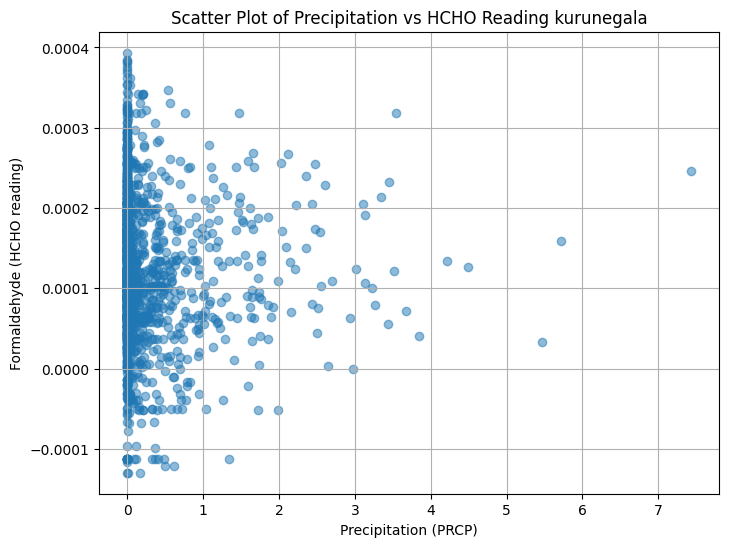

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns for precipitation and HCHO reading
precipitation = kurunegala_combined.select("PRCP").collect()
hcho_reading = kurunegala_combined.select("HCHO reading").collect()

# Convert the collected data to lists
precipitation = [float(row["PRCP"]) for row in precipitation]
hcho_reading = [float(row["HCHO reading"]) for row in hcho_reading]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(precipitation, hcho_reading, alpha=0.5)
plt.title("Scatter Plot of Precipitation vs HCHO Reading kurunegala")
plt.xlabel("Precipitation (PRCP)")
plt.ylabel("Formaldehyde (HCHO reading)")
plt.grid(True)
plt.show()


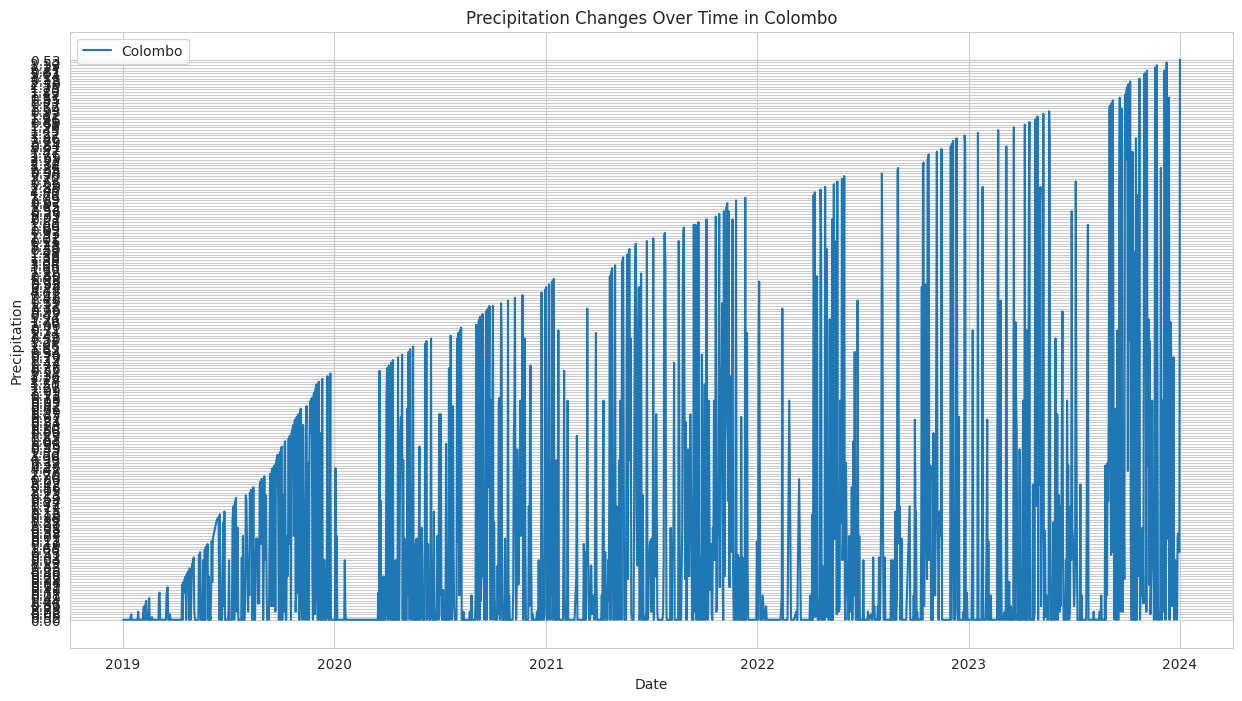

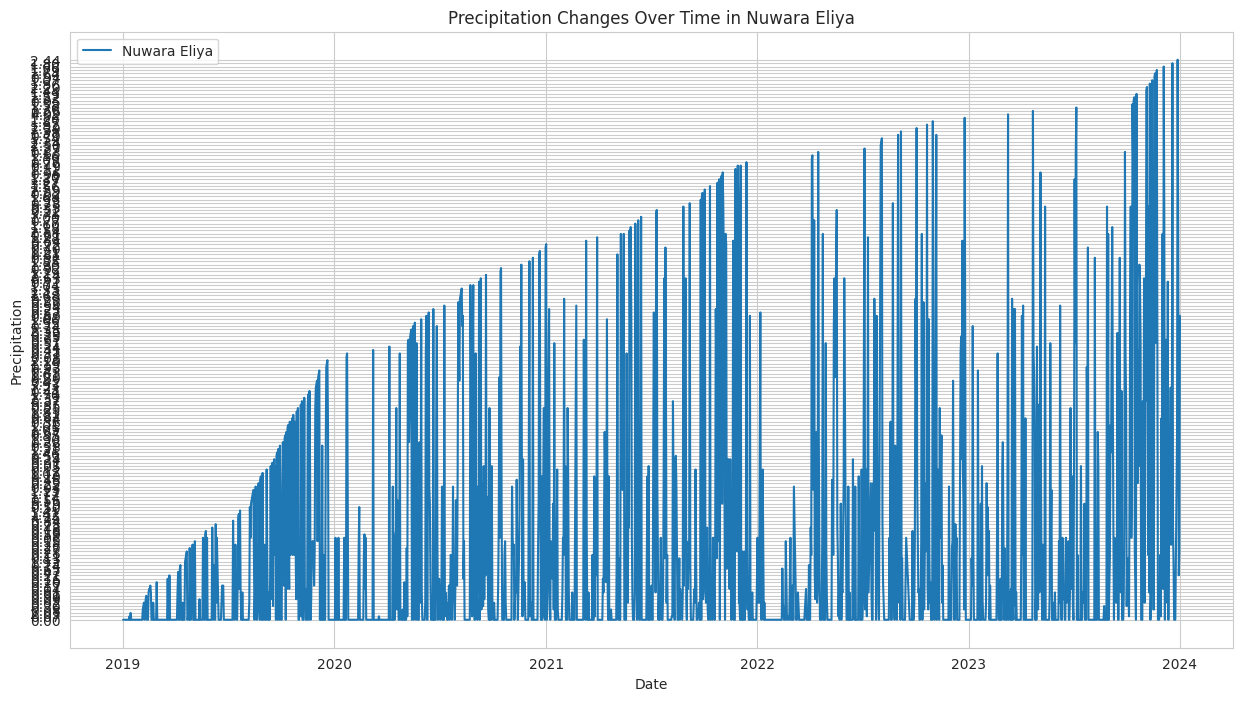

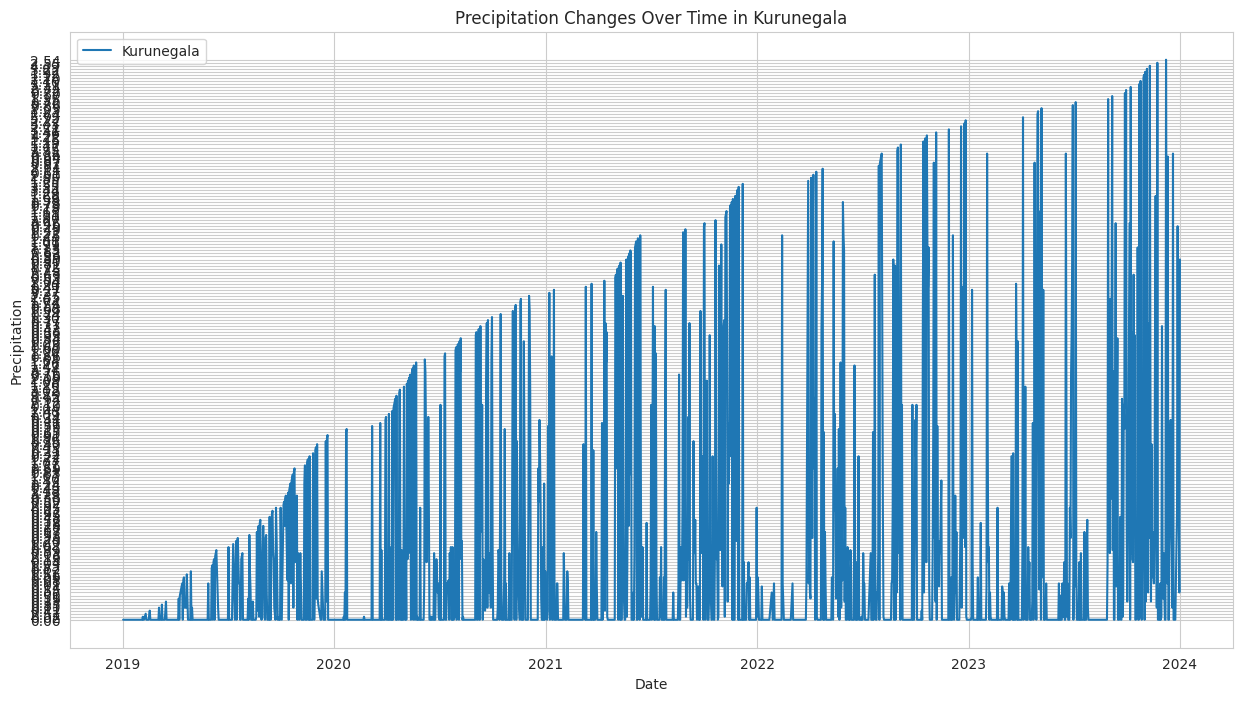

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows with None or NULL values in PRCP column
colombo_data_filtered = colombo_data.filter(colombo_data.PRCP.isNotNull())
nuwara_eliya_data_filtered = nuwara_eliya_data.filter(nuwara_eliya_data.PRCP.isNotNull())
kurunegala_data_filtered = kurunegala_data.filter(kurunegala_data.PRCP.isNotNull())

# Extract date and precipitation values
colombo_dates = [row.DATE for row in colombo_data_filtered.collect()]
colombo_precipitation = [row.PRCP for row in colombo_data_filtered.collect()]

nuwara_eliya_dates = [row.DATE for row in nuwara_eliya_data_filtered.collect()]
nuwara_eliya_precipitation = [row.PRCP for row in nuwara_eliya_data_filtered.collect()]

kurunegala_dates = [row.DATE for row in kurunegala_data_filtered.collect()]
kurunegala_precipitation = [row.PRCP for row in kurunegala_data_filtered.collect()]

# Plot precipitation changes over time for Colombo
plt.figure(figsize=(15, 8))  # Adjust the figure size here
plt.plot(colombo_dates, colombo_precipitation, label="Colombo")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Changes Over Time in Colombo")
plt.legend()
plt.grid(True)
plt.show()

# Plot precipitation changes over time for Nuwara Eliya
plt.figure(figsize=(15, 8))  # Adjust the figure size here
plt.plot(nuwara_eliya_dates, nuwara_eliya_precipitation, label="Nuwara Eliya")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Changes Over Time in Nuwara Eliya")
plt.legend()
plt.grid(True)
plt.show()

# Plot precipitation changes over time for Kurunegala
plt.figure(figsize=(15, 8))  # Adjust the figure size here
plt.plot(kurunegala_dates, kurunegala_precipitation, label="Kurunegala")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Changes Over Time in Kurunegala")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

# Filter out rows with None or NULL values in PRCP column
colombo_data_filtered = colombo_data.filter(colombo_data.PRCP.isNotNull())
nuwara_eliya_data_filtered = nuwara_eliya_data.filter(nuwara_eliya_data.PRCP.isNotNull())
kurunegala_data_filtered = kurunegala_data.filter(kurunegala_data.PRCP.isNotNull())

# Convert Spark DataFrames to Pandas DataFrames
colombo_df = colombo_data_filtered.toPandas()
nuwara_eliya_df = nuwara_eliya_data_filtered.toPandas()
kurunegala_df = kurunegala_data_filtered.toPandas()

# Create line plots for precipitation changes over time using Plotly Express
fig1 = px.line(colombo_df, x='DATE', y='PRCP', title='Precipitation Changes Over Time in Colombo')
fig1.update_xaxes(title='Date')
fig1.update_yaxes(title='Precipitation')

fig2 = px.line(nuwara_eliya_df, x='DATE', y='PRCP', title='Precipitation Changes Over Time in Nuwara Eliya')
fig2.update_xaxes(title='Date')
fig2.update_yaxes(title='Precipitation')

fig3 = px.line(kurunegala_df, x='DATE', y='PRCP', title='Precipitation Changes Over Time in Kurunegala')
fig3.update_xaxes(title='Date')
fig3.update_yaxes(title='Precipitation')

# Show plots
fig1.show()
fig2.show()
fig3.show()


<Figure size 1000x600 with 0 Axes>

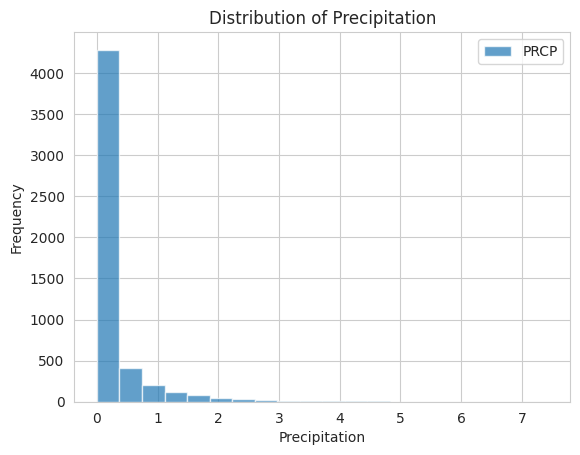

<Figure size 1000x600 with 0 Axes>

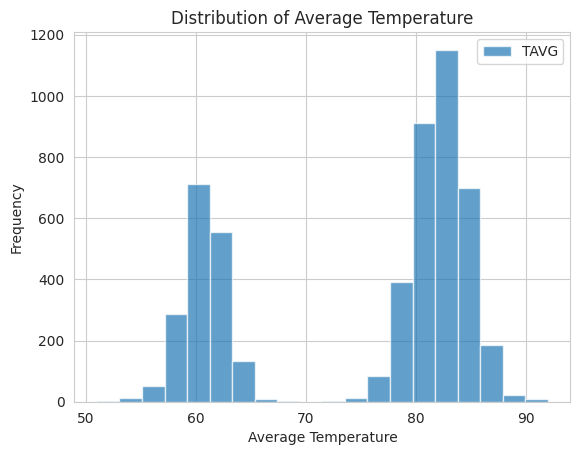

In [ ]:
from pyspark.sql.types import FloatType

# Convert 'PRCP' and 'TAVG' columns to FloatType
prep_temp = prep_temp.withColumn("PRCP", prep_temp["PRCP"].cast(FloatType()))
prep_temp = prep_temp.withColumn("TAVG", prep_temp["TAVG"].cast(FloatType()))

# Plot histogram for precipitation
plt.figure(figsize=(10, 6))
prep_temp.select("PRCP").toPandas().plot(kind="hist", bins=20, alpha=0.7)
plt.title("Distribution of Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.show()

# Plot histogram for average temperature (TAVG)
plt.figure(figsize=(10, 6))
prep_temp.select("TAVG").toPandas().plot(kind="hist", bins=20, alpha=0.7)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import plotly.express as px

# Filter out rows with None or NULL values in TAVG column
colombo_data_filtered_temp = colombo_data.filter(colombo_data.TAVG.isNotNull())
nuwara_eliya_data_filtered_temp = nuwara_eliya_data.filter(nuwara_eliya_data.TAVG.isNotNull())
kurunegala_data_filtered_temp = kurunegala_data.filter(kurunegala_data.TAVG.isNotNull())

# Convert Spark DataFrames to Pandas DataFrames
colombo_df_temp = colombo_data_filtered_temp.toPandas()
nuwara_eliya_df_temp = nuwara_eliya_data_filtered_temp.toPandas()
kurunegala_df_temp = kurunegala_data_filtered_temp.toPandas()

# Create line plots for temperature average changes over time using Plotly Express
fig1 = px.line(colombo_df_temp, x='DATE', y='TAVG', title='Temperature Average Changes Over Time in Colombo')
fig1.update_xaxes(title='Date')
fig1.update_yaxes(title='Temperature Average')

fig2 = px.line(nuwara_eliya_df_temp, x='DATE', y='TAVG', title='Temperature Average Changes Over Time in Nuwara Eliya')
fig2.update_xaxes(title='Date')
fig2.update_yaxes(title='Temperature Average')

fig3 = px.line(kurunegala_df_temp, x='DATE', y='TAVG', title='Temperature Average Changes Over Time in Kurunegala')
fig3.update_xaxes(title='Date')
fig3.update_yaxes(title='Temperature Average')

# Show plots
fig1.show()
fig2.show()
fig3.show()


# ***Importing the population and height above sea level dataset***

In [ ]:
population_height_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/popu_height.csv",header = True)

In [ ]:
population_height_df.show()

+-------------------+-----------+----------------------+
|           Location|Population |height above sea level|
+-------------------+-----------+----------------------+
|     Colombo Proper|     632543|                     4|
|       Kandy Proper|      11701|                   465|
|   Deniyaya, Matara|      76254|                     2|
|Nuwara Eliya Proper|      25775|                  1509|
| Bibile, Monaragala|      35208|                   151|
|      Jaffna Proper|     169102|                     5|
|  Kurunegala Proper|      28571|                   116|
+-------------------+-----------+----------------------+



In [ ]:
population_height_df = population_height_df.withColumnRenamed("Location", "Location_to_remove")

In [ ]:
colombo_df.show()

+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2019-01-11|2019-01-12|2.239188166801278...|
|Colombo Proper|  2019-01-12|2019-01-13|1.569418094178759...|
|Colombo Proper|  2019-01-13|2019-01-14|1.569418094178759...|
|Colombo

In [ ]:
from pyspark.sql.functions import month

# Assuming your DataFrame is named colombo_df
colombo_df = colombo_df.withColumn("Current Date", to_date(colombo_df["Current Date"], "yyyy-MM-dd"))

In [ ]:
colombo_df.show()

+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2019-01-11|2019-01-12|2.239188166801278...|
|Colombo Proper|  2019-01-12|2019-01-13|1.569418094178759...|
|Colombo Proper|  2019-01-13|2019-01-14|1.569418094178759...|
|Colombo

In [ ]:
from pyspark.sql.functions import year


all_cities_2023_df = all_cities_df.filter(year("Current Date") == 2023)


In [ ]:
all_cities_2023_df.show()

+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2023-01-01|2023-01-02|2.195330110993953...|
|Colombo Proper|  2023-01-02|2023-01-03|2.100728033830872...|
|Colombo Proper|  2023-01-03|2023-01-04|1.599005386365537E-4|
|Colombo Proper|  2023-01-04|2023-01-05| 2.42295301221371E-4|
|Colombo Proper|  2023-01-05|2023-01-06|2.767170438908803E-4|
|Colombo Proper|  2023-01-06|2023-01-07| 6.85503448811268E-5|
|Colombo Proper|  2023-01-07|2023-01-08| 6.85503448811268E-5|
|Colombo Proper|  2023-01-08|2023-01-09| 6.85503448811268E-5|
|Colombo Proper|  2023-01-09|2023-01-10|1.428822234902424E-4|
|Colombo Proper|  2023-01-10|2023-01-11|1.209881834626557...|
|Colombo Proper|  2023-01-11|2023-01-12|2.211390002110821...|
|Colombo Proper|  2023-01-12|2023-01-13|2.306530245038820...|
|Colombo Proper|  2023-01-13|2023-01-14|3.188729098136751...|
|Colombo

In [ ]:
from pyspark.sql.functions import year

# Filter the DataFrame to include only the data for the year 2023
all_cities_2023_df = all_cities_df.filter(year("Current Date") == 2023)

# Group by location and calculate sum and average HCHO readings for the year 2023
hcho_2023_summary = all_cities_2023_df.groupBy("Location") \
                                      .agg(F.avg("HCHO reading").alias("Average HCHO"),
                                           F.sum("HCHO reading").alias("Total HCHO"))

# Show the results
hcho_2023_summary.show()



+-------------------+--------------------+--------------------+
|           Location|        Average HCHO|          Total HCHO|
+-------------------+--------------------+--------------------+
|     Colombo Proper|1.525989839338208...|0.055393431167976966|
|   Deniyaya, Matara|8.348371702233224E-5| 0.03013762184506194|
|Nuwara Eliya Proper|1.029586542159272...| 0.03685919820930197|
| Bibile, Monaragala|1.212545265129608...| 0.04413664765071774|
|  Kurunegala Proper|1.230220761116336E-4| 0.04453399155241136|
|      Jaffna Proper|1.105961043805143...|0.039593405368224144|
|       Kandy Proper|9.869486561953196E-5|0.035431456757411973|
+-------------------+--------------------+--------------------+



In [ ]:
def merge_population_height(df):
  df = df.join(hcho_2023_summary, lower(hcho_2023_summary["Location"]) == (lower(df["Location_to_remove"])), "inner")
  return df

In [ ]:
population_height_df.show()

+-------------------+-----------+----------------------+
| Location_to_remove|Population |height above sea level|
+-------------------+-----------+----------------------+
|     Colombo Proper|     632543|                     4|
|       Kandy Proper|      11701|                   465|
|   Deniyaya, Matara|      76254|                     2|
|Nuwara Eliya Proper|      25775|                  1509|
| Bibile, Monaragala|      35208|                   151|
|      Jaffna Proper|     169102|                     5|
|  Kurunegala Proper|      28571|                   116|
+-------------------+-----------+----------------------+



In [ ]:
population_height_df123 = merge_population_height(population_height_df)

In [ ]:
population_height_df123.show()

+-------------------+-----------+----------------------+-------------------+--------------------+--------------------+
| Location_to_remove|Population |height above sea level|           Location|        Average HCHO|          Total HCHO|
+-------------------+-----------+----------------------+-------------------+--------------------+--------------------+
|     Colombo Proper|     632543|                     4|     Colombo Proper|1.525989839338208...|0.055393431167976966|
|   Deniyaya, Matara|      76254|                     2|   Deniyaya, Matara|8.348371702233224E-5| 0.03013762184506194|
|Nuwara Eliya Proper|      25775|                  1509|Nuwara Eliya Proper|1.029586542159272...| 0.03685919820930197|
| Bibile, Monaragala|      35208|                   151| Bibile, Monaragala|1.212545265129608...| 0.04413664765071774|
|  Kurunegala Proper|      28571|                   116|  Kurunegala Proper|1.230220761116336E-4| 0.04453399155241136|
|      Jaffna Proper|     169102|               

In [ ]:
# Drop the column "Location_to_remove" and assign the result back to the original DataFrame
population_height_df123 = population_height_df123.drop("Location_to_remove")


In [ ]:
population_height_df123.show()

+-----------+----------------------+-------------------+--------------------+--------------------+
|Population |height above sea level|           Location|        Average HCHO|          Total HCHO|
+-----------+----------------------+-------------------+--------------------+--------------------+
|     632543|                     4|     Colombo Proper|1.525989839338208...|0.055393431167976966|
|      76254|                     2|   Deniyaya, Matara|8.348371702233224E-5| 0.03013762184506194|
|      25775|                  1509|Nuwara Eliya Proper|1.029586542159272...| 0.03685919820930197|
|      35208|                   151| Bibile, Monaragala|1.212545265129608...| 0.04413664765071774|
|      28571|                   116|  Kurunegala Proper|1.230220761116336E-4| 0.04453399155241136|
|     169102|                     5|      Jaffna Proper|1.105961043805143...|0.039593405368224144|
|      11701|                   465|       Kandy Proper|9.869486561953196E-5|0.035431456757411973|
+---------

In [ ]:
from pyspark.sql import functions as F

# Calculate the correlation between Population and Average HCHO within cities
correlation_population_hcho = population_height_df123.select(
    F.corr("Population ", "Average HCHO").alias("Correlation")
).collect()[0]["Correlation"]

# Print the correlation
print("Correlation between Population and Average HCHO within cities:", correlation_population_hcho)


Correlation between Population and Average HCHO within cities: 0.7536471770404887


In [ ]:
from pyspark.sql import functions as F

# Calculate the correlation between Population and Average HCHO within cities
correlation_population_hcho = population_height_df123.select(
    F.corr("Population ", "Total HCHO").alias("Correlation")
).collect()[0]["Correlation"]

# Print the correlation
print("Correlation between Population and Total HCHO within cities:", correlation_population_hcho)

Correlation between Population and Total HCHO within cities: 0.7509047052534736


In [ ]:
from pyspark.sql import functions as F

# Calculate the correlation between height above sea level and Average HCHO within cities
correlation_height_hcho = population_height_df123.select(
    F.corr("height above sea level", "Average HCHO").alias("Correlation")
).collect()[0]["Correlation"]

# Print the correlation
print("Correlation between height above sea level and Average HCHO within cities:", correlation_height_hcho)


Correlation between height above sea level and Average HCHO within cities: -0.27313403389842655


In [ ]:
from pyspark.sql import functions as F

# Calculate the correlation between height above sea level and Average HCHO within cities
correlation_height_hcho = population_height_df123.select(
    F.corr("height above sea level", "Total HCHO").alias("Correlation")
).collect()[0]["Correlation"]

# Print the correlation
print("Correlation between height above sea level and Total HCHO within cities:", correlation_height_hcho)


Correlation between height above sea level and Total HCHO within cities: -0.28489031513829405


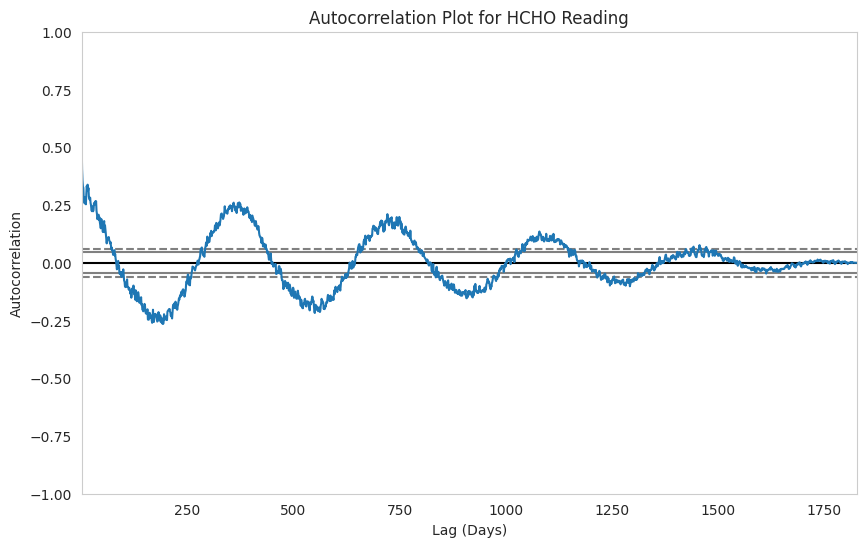

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
colombo_df = colombo_df.toPandas()
# Assuming your DataFrame is named colombo_df and 'HCHO reading' is the column of interest
# Convert the 'HCHO reading' column to numeric if it's not already
colombo_df['HCHO reading'] = pd.to_numeric(colombo_df['HCHO reading'], errors='coerce')

# Drop any NaN values if present
colombo_df.dropna(subset=['HCHO reading'], inplace=True)

# Create the autocorrelation plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(colombo_df['HCHO reading'])
plt.title('Autocorrelation Plot for HCHO Reading')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.show()